# Авторынок Казахстана 2019


# Описание проекта

Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG, после перевода из эксель в csv обнаружились множественны проблемы с исходными данными: некорректные разделители десятичных разрядов, несоответствие данных типу данных. Дополнительной проблемой является то, что статистику собирал не один
человек, поэтому есть неявные дубликаты - например, 4WD, 4 WD и 4-WD, а также одни и те же признаки могут быть записаны как на русском, так и на английском языке. Также необходимо очистить датасет от лишних столбцов, которые используют технические специалисты, но которые не нужны в управленческом учете.

# Описание данных

Файл `auto_kz_2019.csv`:
- `Год` – год продажи (2019)
- `Месяц` – месяц продажи (январь - сентябрь)
- `Компания` – название автоцентра
- `Бренд` – название продаваемой марки автомобиля
- `Модель` – название модели автомобиля
- `Модификация` – модификация модели автомобиля
- `Год выпуска` – год производства автомобиля
- `Страна-производитель` – страна, где произведен автомобиль
- `Вид топлива` – бензин, дизель, электричество, гибрид
- `Объём двиг л` – объем двигателя автомобиля в литрах
- `Коробка передач` – тип коробки переключения передач
- `Тип привода` – тип привода
- `Сегмент` – сегмент, к которому относится авто
- `Регион` – регион продажи
- `Наименование дилерского центра` – совпадает с компанией
- `Тип клиента` – юридическое или физическое лицо
- `Форма расчета` – наличный и безналичный расчет
- `Количество` – количество автомобилей в заказе
- `Цена USD` – цена автомобиля
- `Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)
- `Область` – область продажи
- `Сегментация 2013` – сегмент автомобиля актуальный
- `Класс 2013` – класс автомобиля актуальный
- `Сегментация Eng` – английская сегментация
- `Локализация производства` – совпадает со страной производителем

**Признаки-категории:**
- сегмент
- класс
- тип привода
- коробка передач


**Способ сбора**

Агрегация данных от марок

**Предобработка**

Из xlsx конвертировано в csv

# Ход исследования

**Шаг 1. Загрузим данные и изучим общую информацию**
- Загрузим данные с нужным разделителем десятичных разрядов
- Изучим общую информацию о датасете

**Шаг 2. EDA**

2.1 Приведем названия столбцов к snake_case

2.2 *Столбцы:*
- Что они означают? Распишем смысл каждого столбца и оценим его важность для цели задачи
- Выделим группы связанных столбцов. Поищем противоречия между ними
- Проанализируем и изменим тип данных
- Найдем аномалии и неявные дубликаты

2.3 *Индекс строк*
- Несёт ли какую-то смысловую нагрузку индекс строк? Это уникальный индекс?
- Упорядочены ли строки: по индексу/дате/признаку/чему-то ещё?
- Есть ли мультииндексы? Нужны ли они? Удобнее будет работать с ними или без них? Примем решение и реализуем его

2.4 *Явные дубликаты:*
- Есть ли полные дубликаты в датасете?
- Есть ли в датасете генерируемые автоматически признаки, которые не стоит учитывать при поиске дубликатов?
- Есть ли столбцы, все значения в которых должны быть уникальны?

2.5 *Анализ пропусков:*
- Наличие пропусков в столбцах, процентное соотношение пропусков к заполненным значениям
- Определение типа пропусков (MCAR, MAR, MNAR) и возможности их импутации

**Шаг 3. Анализируем рынок**
- Топовые марки на рынке Казахстана: в денежном и натуральном выражении (5-10 марок)
- Продажи на рынке Казахстана всех марок в денежном и натуральном выражении
- Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)
- Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент
- Продажи по регионам
- Продажи по автоцентрам
- Сводные таблицы: объем продаж по бренду и классу авто
- На основании полученных данных можем выделить самый продаваемый автомобиль / бренд / автоцентр / регион?

**Шаг 4. Считаем показатели эффективности Mercur Auto**
- Выручка:
    - за период: общая выручка, выручка по брендам, средняя стоимость продажи за период, средняя стоимость в разбивке по брендам
    - помесячно: выручка по брендам, ежемесячная средняя стоимость продажи, ежемесячная стоимость продажи в разбивке по брендам  
- Доля рынка:
    - посчитаем общую долю рынка дилера: в количественном и стоимостном выражении
    - посчитаем долю рынка дилера по брендам
    - посчитаем долю рынка дилера по типам машин   
- Конкуренты:   
    - лидеры рынка
    - ближайшие конкуренты дилера (тот же регион, та же марка, тот же класс машин)

*Сделаем выводы / дадим рекомендации:*
- Что делать дальше автодилеру при текущей ситуации?  

**Шаг 5. Финальный вывод**

# 1 Загрузим данные и изучим общую информацию


## 1.1 Импортируем библиотеки

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50) # отображение всех столбцов без сокращений
pd.options.display.float_format ='{:,.2f}'.format # отображение больших сумм

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# отображение сообщений об ошибках
import warnings
warnings.filterwarnings('ignore')

## 1.2 Загрузим данные из CSV-файла в переменные

In [ ]:
url='https://drive.google.com/file/d/1WokB8z21mtGpoTSL0Gw0jatLGFVCAku5/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, decimal = ',', sep=';')

## 1.3 Посмотрим на содержимое датасета

In [ ]:
df

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,"28,115.00","28,115.00",г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.00,"32,246.99","32,246.99",г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,"32,000.00","32,000.00",г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,"31,929.00","31,929.00",г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,"31,929.00","31,929.00",г.Алматы,Легковые автомобили,D класс,D,Импорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39962,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39963,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство
39964,2019,Сентябрь,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,Республика Казахстан,Дизель,NaN,MT,NaN,Грузовой автомобиль,Актобе,ЗапКазКАМАЗ -Актобе,Юр. Лицо,Безналичная,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство


👀 В нашем распоряжении 39 966 строк, 25 столбцов


##1.4 Выведем основную информацию о датафрейме

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             39966 non-null  int64  
 1   Месяц                           39966 non-null  object 
 2   Компания                        39966 non-null  object 
 3   Бренд                           39966 non-null  object 
 4   Модель                          39966 non-null  object 
 5   Модификация                     36375 non-null  object 
 6   Год выпуска                     39465 non-null  object 
 7   Страна-производитель            39966 non-null  object 
 8   Вид топлива                     36826 non-null  object 
 9   Объём двиг, л,                  35708 non-null  object 
 10  Коробка передач                 36711 non-null  object 
 11  Тип привода                     35677 non-null  object 
 12  Сегмент                         

👀 Уже предварительно видим столбцы с пропусками и некорректными типами данных:
- `Год` и `Месяц` - можно объединить в одну дату продажи с типом datetime
- `Год выпуска` - в int
- `Объём двиг, л,` - в float
- `Количество` - в int
- `Цена, USD` и `Продажа, USD` - в float

Также можно удалить некоторые столбцы, не задействованные в исследовании. Но их влияние далее надо исследовать более детально


In [ ]:
# Обзор данных
df.describe()

,Год,Количество,"Цена, USD","Продажа, USD"
count,"39,966.00","39,960.00","39,966.00","39,966.00"
mean,"2,019.00",1.35,"28,250.16","33,757.67"
std,0.00,2.37,"20,005.76","50,702.45"
min,"2,019.00",-1.00,"7,100.00","-35,588.25"
25%,"2,019.00",1.00,"15,518.50","16,601.93"
50%,"2,019.00",1.00,"24,282.27","26,248.96"
75%,"2,019.00",1.00,"32,505.66","35,000.00"
max,"2,019.00",115.00,"328,510.97","3,778,206.26"


👀
- имеем данные за 2019 год
- цены выглядят правдоподобно
- есть аномалии в виде отрицательных значений в `Количество` и `Продажа, USD`, к этому вернемся дальше


## 1.5 Вывод по шагу 1

Загрузили данные и изучили общую информацию:
- В нашем распоряжении данные за 2019 год
- Здесь 39 966 строк, 25 столбцов
- Есть столбцы с пропусками и некорректными типами данных:
    - `Год` и `Месяц` - можно объединить в одну дату продажи с типом datetime
    - `Год выпуска` - в int
    - `Объём двиг, л,` - в float
    - `Количество` - в int
    - `Цена, USD` и `Продажа, USD` - в float
- Есть аномалии в виде отрицательных значений в `Количество` и `Продажа, USD`
- Можно удалить некоторые столбцы, не задействованные в исследовании, потому что кажется, что они повторяют друг друга. Их влияние далее надо исследовать далее более детально

# 2 EDA

## 2.1 Названия столбцов к snake_case

In [ ]:
# Приведем столбцы к snake_case
df = df.rename(columns={'Год': 'year', 'Месяц': 'month', 'Компания': 'autocenter', 'Бренд': 'car_brand',
                        'Модель': 'car_model', 'Модификация': 'car_modification', 'Год выпуска': 'release_year',
                        'Страна-производитель': 'country_manufacturer', 'Вид топлива': 'fuel_type',
                        'Объём двиг, л,': 'engines_displacement', 'Коробка передач': 'transmission',
                        'Тип привода': 'drive_type', 'Сегмент': 'segment', 'Регион': 'region',
                        'Наименование дилерского центра': 'dealer_name', 'Тип клиента': 'client_type',
                        'Форма расчета': 'payment_method', 'Количество': 'quantity', 'Цена, USD': 'price_usd',
                        'Продажа, USD': 'sale_usd', 'Область': 'district', 'Сегментация 2013': 'car_segment',
                        'Класс 2013': 'car_class', 'Сегментация Eng': 'eng_car_class',
                        'Локализация производства': 'production_loc'})
df.sample()

,year,month,autocenter,car_brand,car_model,car_modification,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,dealer_name,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc
5122,2019,Март,Astana Motors,Hyundai,Creta,Hyundai Creta Active,2019,Республика Казахстан,Бензин,"1,6",6 AT,2 WD,B-SUV,Караганда,Автомир-Центр Караганда,Физ. Лицо,NaN,1.00,"18,010.61","18,010.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство


## 2.2 Заглянем в столбцы: удалим лишние и исправим неявные дубли

### `year` и `month`

Содержит год и месяц продажи

In [ ]:
df['year'].unique()

array([2019])

👀 Данные 2019 года

In [ ]:
df['month'].unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

👀 9 месяцев с января по сентябрь включительно

Для удобства объединим 'year' + 'month'. За день можем взять, например, первый день месяца (это важно для приведения к datetime). Назовем его `sale_date`

In [ ]:
# Внесем даты в отдельный столбец 'sale_date', учитывая месяц из 'month'
df.loc[df['month'] == 'Январь', 'sale_date'] = '2019-01-01'
df.loc[df['month'] == 'Февраль', 'sale_date'] = '2019-02-01'
df.loc[df['month'] == 'Март', 'sale_date'] = '2019-03-01'
df.loc[df['month'] == 'Апрель', 'sale_date'] = '2019-04-01'
df.loc[df['month'] == 'Май', 'sale_date'] = '2019-05-01'
df.loc[df['month'] == 'Июнь', 'sale_date'] = '2019-06-01'
df.loc[df['month'] == 'Июль', 'sale_date'] = '2019-07-01'
df.loc[df['month'] == 'Август', 'sale_date'] = '2019-08-01'
df.loc[df['month'] == 'Сентябрь', 'sale_date'] = '2019-09-01'

# Преобразуем строки в datetime
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%Y-%m-%d')

# Проверим, что замены выполнены успешно
df['sale_date'].unique()

array(['2019-05-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# После этого столбцы 'year' и 'month' можно удалить
df.drop(['year', 'month'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,car_modification,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,dealer_name,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
17124,БИПЭК АВТО,Lada,Granta,NaN,2019,Республика Казахстан,Бензин,"1,596",4 АТ,Передний,B класс,Петропавловск,БИПЭК АВТО Петропавловск,NaN,NaN,3.00,"7,100.00","21,300.00",Северо-Казахстанская область,Легковые автомобили,B класс,B,Локальное производство,2019-03-01


### `autocenter` и `dealer_name`

Содержат названия дилеров

In [ ]:
df['autocenter'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

👀 Есть неявные дубликаты:
- 'Astana Motors' и 'Astana Motors ' - допущен пробел: объединим
- 'Autokapital' и 'Автокапитал' - одно и то же: объединим
- 'ММС Рус' и 'MMC RUS' - одно и то же: объединим
- 'Mercur Auto' и 'Mercur Autos' - одно и то же: объединим
- 'Равон Моторс Казахстан' и 'Ravon Motors Kazakstan' -  одно и то же: объединим
- 'Хино Моторс Казахстан' и 'Hino Motors ' - предположу, что организации разные, но надо убрать пробел в 'Hino Motors '
- 'ТОО "Eurasia Motor Zhaik"' - уберем кавычки в названии
- Caspian Motors и Каспиан Моторс - одно и то же: объединим

Выполним необходимые замены:

In [ ]:
df['autocenter'] = df['autocenter'].replace({'Astana Motors ': 'Astana Motors', 'Autokapital': 'Автокапитал',
                                             'MMC RUS': 'ММС Рус', 'Ravon Motors Kazakstan': 'Равон Моторс Казахстан',
                                             'Hino Motors ': 'Hino Motors', 'ТОО "Eurasia Motor Zhaik"': 'ТОО Eurasia Motor Zhaik',
                                             'Caspian Motors':'Каспиан Моторс', 'Mercur Autos': 'Mercur Auto'})
df['autocenter'].unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Каспиан Моторс',
       'СемАЗ', 'Astana Motors', 'Hyundai Com Trans Kazakhstan ',
       'Nissan Manufacturing RUS', 'СВС-ТРАНС', 'Allur Auto',
       'Almaty Motors Premium', 'TERRA MOTORS', 'ТК КАМАЗ',
       'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Автокапитал',
       'ММС Рус', 'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Renault Россия', 'Scania Central Asia', 'Subaru Kazakhstan',
       'Volkswagen Group Rus', 'Автодом Motors KST', 'Автомир-Центр',
       'ТОО Eurasia Motor Zhaik', 'Scandinavian Motors',
       'Хино Моторс Казахстан', 'Hino Motors'], dtype=object)

Есть похожий столбец 'dealer_name', рассмотрим его:

In [ ]:
df['dealer_name'].unique()

array(['Mercur Auto Алматы', 'Mercur Auto Астана',
       'Автоцентр-Бавария Астана', 'Автоцентр-Бавария Алматы',
       'Автоцентр Бавария Восток', 'ЖАЙЫК HYUNDAI MOTORS',
       'Hyundai Auto Kostanai', 'БИПЭК АВТО Костанай',
       'БИПЭК АВТО Астана', 'БИПЭК АВТО Павлодар', 'БИПЭК АВТО Алматы',
       'БИПЭК АВТО Семей', 'БИПЭК АВТО Шымкент', 'БИПЭК АВТО Актау',
       'БИПЭК АВТО Усть-Каменогорск', 'БИПЭК АВТО Атырау',
       'БИПЭК АВТО Актобе', 'БИПЭК АВТО Уральск', 'БИПЭК АВТО Караганда',
       'БИПЭК АВТО Петропавловск', 'Вираж Алматы', 'Вираж Кокшетау',
       'Вираж Уральск', 'Вираж Петропавловск', 'Вираж Павлодар',
       'Вираж Караганда', 'Вираж Астана', 'Вираж Костанай', 'Вираж Актау',
       'Вираж Усть-Каменогорск', 'Вираж Актобе', 'Вираж Атырау',
       'Вираж Шымкент', 'Вираж Семей', 'Вираж Рудный', 'Вираж Кызылорда',
       'Вираж Тараз', 'Cadillac Almaty', 'Daewoo Bus Kazakhstan',
       'Авто Сити', 'Ford Атырау', 'Меридиан АВТО Алматы', 'СемАЗ',
       'Меридиан

👀 Этот список больше. Нам достаточно данных из 'autocenter', удалим его:

In [ ]:
df.drop(['dealer_name'], axis=1 , inplace=True)
df.sample()

,autocenter,car_brand,car_model,car_modification,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
29534,Toyota Motor Kazakhstan,Toyota,Camry,B4,2019,Российская Федерация,Бензин,"2,5",AT,FF,D класс,Нур-Султан,Физ. Лицо,NaN,1.00,"29,209.20","29,209.20",г.Нур-Султан,Легковые автомобили,D класс,D,Импорт,2019-07-01


### `car_brand`

Содержит данные о бренде авто

In [ ]:
df['car_brand'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

👀 С брендами всё в порядке, оставим

### `car_model`

Содержит данные о модели авто

In [ ]:
sorted_list = df['car_model'].unique()
print(sorted(sorted_list))

['2206', '2217', '2310', '2705', '2752', '3', '3 серия', '300', '301', '3151', '3221', '32551', '3302', '3303', '3308', '3309', '3741', '3909', '3962', '4308', '4311', '43118', '4320', '4320-1951-40', '4320-1951-60', '43253', '43502', '44108', '45141', '45142', '45143', '4x4', '5 серия', '500', '5299', '53215', '53504', '53605', '54115', '5490', '5557', '58815Z', '6', '6 серия', '65111', '65115', '65116', '65117', '6520', '65206', '65225', '66052', '6606', '7 серия', '8 серия', '911 Carrera S', 'A-Class', 'A3', 'A4', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros', 'Almera', 'Amarok', 'Arkana', 'Aveo', 'BC 095', 'BC 211 MA', 'BJ1069VDJEA-F1', 'BJ3253DMPKB-AD', 'BS 106 A', 'BS 106 D', 'BWC6665GA5', 'C-Class', 'C-HR', 'CLA-Class', 'CLS-Class', 'CX-5', 'CX-9', 'Cabrio', 'Caddy Kasten ', 'Caddy Maxi Kombi', 'Camaro', 'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne', 'Cerato', 'Corolla', 'Countryman', 'County', 'Creta', 'D-MAX', 'Daily', 'Daily A', 'Daily V', 'Discovery', 'Discovery Sport', 

👀 Пробел в 'Caddy Kasten ', 'Transporter Kombi ' - исправим

In [ ]:
df['car_model'] = df['car_model'].replace({'Caddy Kasten ': 'Caddy Kasten',
                                           'Transporter Kombi ': 'Transporter Kombi'})

### `car_modification`

Содержит данные о комплектации авто

In [ ]:
# Значения в 'car_modification'
df['car_modification'].unique()

array(['TFSI', 'TFSI Allroad', 'A8L TFSI', ..., 'B3P2M3TX5C', 'V90CC Pro',
       'KAMAZ 58815Z'], dtype=object)

👀 Нам это не нужно, удалим

In [ ]:
df.drop(['car_modification'], axis=1 , inplace=True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
23582,Allur Auto,Ravon,Nexia R3,2019,Республика Казахстан,Бензин,"1,485",АТ,Передний (FF),Коммерческие автомобили,ЭКСПОРТ,Юр. Лицо,безналичный,1.00,"8,803.00","8,803.00",Экспорт область,Легковые автомобили,B класс,B,Локальное производство,2019-09-01


### `release_year`

Содержит год производства авто

In [ ]:
df['release_year'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011',
       '2\xa0018', '2\xa0019'], dtype=object)

👀 \xa0 - это неразрывный пробел. Используется для автоматизации вёрстки, правила которой предписывают избегать разрыва строк в известных случаях (большей частью для удобочитаемости). Исправим:

In [ ]:
df['release_year'] = df['release_year'].replace({'2\xa0018': '2018','2\xa0019': '2019'})
df['release_year'].unique()

array(['2018', '2017', '2019', nan, '2016', '2014', '2013', '2011'],
      dtype=object)

Приведем `release_year` к числовому типу данных:

In [ ]:
df['release_year'] = df['release_year'].astype('Int64')
df['release_year'].unique()

<IntegerArray>
[2018, 2017, 2019, <NA>, 2016, 2014, 2013, 2011]
Length: 8, dtype: Int64

### `country_manufacturer`

Содержит данные о стране-производителе

In [ ]:
df['country_manufacturer'].unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

👀 Для удобства приведем страны в единый краткий формат (Alpha3)

In [ ]:
df['country_manufacturer'] = df['country_manufacturer'].replace({'Германия': 'DEU', 'США': 'USA',
                                                                 'Австрия': 'AUT','Республика Казахстан': 'KAZ',
                                                                 'Российская Федерация': 'RUS', 'Корея': 'KOR',
                                                                 'Япония': 'JPN','Таиланд': 'THA',
                                                                 'Китай': 'CHN', 'UK': 'GBR',
                                                                 'Узбекистан': 'UZB','Венгрия': 'HUN',
                                                                 'Турция': 'TUR', 'Испания': 'ESP',
                                                                 'Нидерланды': 'NLD','Польша': 'POL',
                                                                 'Швеция': 'SWE','Белоруссия': 'BLR',
                                                                 'Бельгия': 'BEL'})
df['country_manufacturer'].unique()

array(['DEU', 'USA', 'AUT', 'KAZ', 'RUS', 'KOR', 'JPN', 'THA', 'CHN',
       'GBR', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE', 'BLR',
       'BEL'], dtype=object)

### `fuel_type`

Содержит данные о типе топлива

In [ ]:
df['fuel_type'].unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

👀 Тип топлива разделим на категории:
- бензин
- дизель
- электро
- гибрид


In [ ]:
df['fuel_type'] = df['fuel_type'].replace({'Бензин': 'бензин', 'бензин ': 'бензин', 'Дизель': 'дизель',
                                           'Электричество': 'электро', 'Электро': 'электро',
                                           'дизель ':'дизель'})
pd.value_counts(df['fuel_type']).to_frame()

,fuel_type
бензин,34960
дизель,1803
2,23
"1,6",14
электро,13
гибрид,10
0,3


👀 Остальное выглядит как кривое копирование данных из других столбцов, проверим:

In [ ]:
df.loc[((df['fuel_type'] == '2') | (df['fuel_type' ] == '1,6') | (df['fuel_type' ] == '0'))]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
23723,Renault Россия,Renault,Duster,2019,RUS,2,MT,4WD,4WD,0,Уральск,NaN,NaN,1.00,"12,249.61","12,249.61",Западно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23724,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,0,Нур-Султан,NaN,NaN,1.00,"12,249.61","12,249.61",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23725,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,0,Нур-Султан,NaN,NaN,1.00,"12,249.61","12,249.61",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23726,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,0,Кызылорда,NaN,NaN,1.00,"12,249.61","12,249.61",Кызылординская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23727,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23728,Renault Россия,Renault,Duster,2018,RUS,"1,6",MT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23729,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23730,Renault Россия,Renault,Duster,2018,RUS,2,AT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23731,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01
23732,Renault Россия,Renault,Duster,2018,RUS,2,MT,4WD,4WD,0,Караганда,NaN,NaN,1.00,"12,249.61","12,249.61",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Импорт,2019-01-01


👀 Действительно, больше похоже на объем двигателя, съехавшего из столбца 'engines_displacement'. AT и MT соответственно - это данные о коробки передач из 'transmission'. А 'drive_type' повторяет данные из 'transmission' 😅

Восстановление сдвига для Renault не поможет узнать нужные сведения - удалим эти строки (незначительное влияние на выборку)

Для UAZ 3741 ничего не съехало, поправим нули на бензин


In [ ]:
# удалим съехавшие строки
df = df.query('fuel_type != "2" & fuel_type != "1,6"')

# заменим 0 на бензин
df['fuel_type'] = df['fuel_type'].replace({'0': 'бензин'})

pd.value_counts(df['fuel_type']).to_frame()

,fuel_type
бензин,34963
дизель,1803
электро,13
гибрид,10


### `engines_displacement`

Содержит данные об объеме двигателя

In [ ]:
display(df['engines_displacement'].unique())
display(df['engines_displacement'].info())

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

<class 'pandas.core.series.Series'>
Int64Index: 39929 entries, 0 to 39965
Series name: engines_displacement
Non-Null Count  Dtype 
--------------  ----- 
35671 non-null  object
dtypes: object(1)
memory usage: 623.9+ KB


None

👀
- #Н/Д заменим на nan
- запятые заменим на точки
- зачистим из данных всё, кроме чисел и точек (хвост с названием движка нам не требуется, только литры)
- приведем к типу float


In [ ]:
# #Н/Д заменим на nan
df.loc[df['engines_displacement'] =='#Н/Д', 'engines_displacement']=np.nan

# точки заменим запятыми
df['engines_displacement'] = df['engines_displacement'].str.replace(r"[\,]", ".", regex=True)

# зачистим из данных всё, кроме чисел и запятых
df['engines_displacement'] = df['engines_displacement'].str.replace(r"[^\d\.]", "", regex=True)


df['engines_displacement'].unique()

array(['1.4', '2', '3', '4.4', '6.6', '1.5', '1.596', '2.4', '1.7',
       '26.7', '25.7', '24.7', '23.7', '22.7', '21.7', '20.7', '19.7',
       '18.7', '17.7', '16.7', '15.7', '14.7', '13.7', '12.7', '11.7',
       '10.7', '9.7', '8.7', '7.7', '6.7', '5.7', '4.7', '3.7', '2.7',
       '6.2', '2.5', '1.6', nan, '2.8', '4.3', '4.3.', '2.0', '3.9',
       '7.5', '12.3', '3.5', '5.6', '5.2', '3.0', '5', '1.598', '1.248',
       '1.998', '2.359', '1.999', '3.342', '1.591', '3.47', '1.69',
       '1.774', '4.6', '1.8', '10.5', '4', '5.5', '12', '12.8', '11',
       '2.2', '1.2', '1.485', '13', '1.33', '4.0', '2.693', '3.8', '3.6',
       '7.6', '4.9', '2.9', '400..', '4.98.', '4.98', '88', '8.4.', '6.5'],
      dtype=object)

In [ ]:
# некоторые замены сделаем руками
df['engines_displacement'] = df['engines_displacement'].replace({'4.3.':'4.3', '400..':'400.0', '4.98.':'4.98','8.4.':'8.4'})

# приведем к типу float
df['engines_displacement'] = df['engines_displacement'].apply(lambda x: float(x))
df['engines_displacement'].unique()

array([  1.4  ,   2.   ,   3.   ,   4.4  ,   6.6  ,   1.5  ,   1.596,
         2.4  ,   1.7  ,  26.7  ,  25.7  ,  24.7  ,  23.7  ,  22.7  ,
        21.7  ,  20.7  ,  19.7  ,  18.7  ,  17.7  ,  16.7  ,  15.7  ,
        14.7  ,  13.7  ,  12.7  ,  11.7  ,  10.7  ,   9.7  ,   8.7  ,
         7.7  ,   6.7  ,   5.7  ,   4.7  ,   3.7  ,   2.7  ,   6.2  ,
         2.5  ,   1.6  ,     nan,   2.8  ,   4.3  ,   3.9  ,   7.5  ,
        12.3  ,   3.5  ,   5.6  ,   5.2  ,   5.   ,   1.598,   1.248,
         1.998,   2.359,   1.999,   3.342,   1.591,   3.47 ,   1.69 ,
         1.774,   4.6  ,   1.8  ,  10.5  ,   4.   ,   5.5  ,  12.   ,
        12.8  ,  11.   ,   2.2  ,   1.2  ,   1.485,  13.   ,   1.33 ,
         2.693,   3.8  ,   3.6  ,   7.6  ,   4.9  ,   2.9  , 400.   ,
         4.98 ,  88.   ,   8.4  ,   6.5  ])

В легковых автомобилях обычно двигатели до 5 л. В грузовых встречается до 13. Все что выше этих значений выглядит аномально:

In [ ]:
# выведем автомобили с движком больше 13 литров
df.loc[(df['engines_displacement'] > 13)]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
399,Вираж,Chevrolet,Niva,2019,KAZ,бензин,26.70,MT,4WD,Внедорожники,Костанай,Юр. Лицо,безналичный,1.00,"10,536.24","10,536.24",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
400,Вираж,Chevrolet,Niva,2019,KAZ,бензин,25.70,MT,4WD,Внедорожники,Атырау,Физ. Лицо,безналичный,1.00,"10,536.24","10,536.24",Атырауская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
401,Вираж,Chevrolet,Niva,2019,KAZ,бензин,24.70,MT,4WD,Внедорожники,Костанай,Юр. Лицо,безналичный,1.00,"10,536.24","10,536.24",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
402,Вираж,Chevrolet,Niva,2019,KAZ,бензин,23.70,MT,4WD,Внедорожники,Рудный,Физ. Лицо,наличный,1.00,"10,536.24","10,536.24",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
403,Вираж,Chevrolet,Niva,2019,KAZ,бензин,22.70,MT,4WD,Внедорожники,Рудный,Юр. Лицо,безналичный,1.00,"10,536.24","10,536.24",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
404,Вираж,Chevrolet,Niva,2019,KAZ,бензин,21.70,MT,4WD,Внедорожники,Нур-Султан,Физ. Лицо,наличный,1.00,"10,536.24","10,536.24",г.Нур-Султан,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
405,Вираж,Chevrolet,Niva,2019,KAZ,бензин,20.70,MT,4WD,Внедорожники,Караганда,Юр. Лицо,безналичный,1.00,"10,536.24","10,536.24",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
406,Вираж,Chevrolet,Niva,2019,KAZ,бензин,19.70,MT,4WD,Внедорожники,Костанай,Физ. Лицо,безналичный,1.00,"10,536.24","10,536.24",Костанайская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
407,Вираж,Chevrolet,Niva,2019,KAZ,бензин,18.70,MT,4WD,Внедорожники,Усть-Каменогорск,Юр. Лицо,безналичный,1.00,"10,536.24","10,536.24",Восточно-Казахстанская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
408,Вираж,Chevrolet,Niva,2019,KAZ,бензин,17.70,MT,4WD,Внедорожники,Караганда,Физ. Лицо,безналичный,1.00,"10,536.24","10,536.24",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01


👀 Проверим в интернете:
1. Chevrolet Niva - имеет двигатель 1.8
2. Jaguar I-Pace - у него 400 л.с, но нет объема двигателя как такового, тк это электрокар
3. ANKAI HFF6124G03EV3 - китайский электрический автобус (88 имеются ввиду киловаты 88 KWH), также не имеет объема двигателя

In [ ]:
# 400 и 88 заменим на nan, тк фактически данным по объему движка нет
df.loc[(df['engines_displacement'] == 88) | (df['engines_displacement' ] == 400), 'engines_displacement']=np.nan

# остальное заменим на 1.8
df.loc[(df['engines_displacement'] > 13), 'engines_displacement']=1.8
df['engines_displacement'].unique()

array([ 1.4  ,  2.   ,  3.   ,  4.4  ,  6.6  ,  1.5  ,  1.596,  2.4  ,
        1.7  ,  1.8  , 12.7  , 11.7  , 10.7  ,  9.7  ,  8.7  ,  7.7  ,
        6.7  ,  5.7  ,  4.7  ,  3.7  ,  2.7  ,  6.2  ,  2.5  ,  1.6  ,
          nan,  2.8  ,  4.3  ,  3.9  ,  7.5  , 12.3  ,  3.5  ,  5.6  ,
        5.2  ,  5.   ,  1.598,  1.248,  1.998,  2.359,  1.999,  3.342,
        1.591,  3.47 ,  1.69 ,  1.774,  4.6  , 10.5  ,  4.   ,  5.5  ,
       12.   , 12.8  , 11.   ,  2.2  ,  1.2  ,  1.485, 13.   ,  1.33 ,
        2.693,  3.8  ,  3.6  ,  7.6  ,  4.9  ,  2.9  ,  4.98 ,  8.4  ,
        6.5  ])

### `transmission`

Содержит данные о коробке передач

In [ ]:
df['transmission'].unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       '#Н/Д', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП', '5М', 'М/T',
       ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT', 'РЕДУКТОР'],
      dtype=object)

👀 Столько категорий не нужно, упростим:

In [ ]:
# '#Н/Д' заменим на nan
df.loc[(df['transmission'] == '#Н/Д'), 'transmission']=np.nan

Коробки передач поделим на категории:

|название категории|что сюда отнесем|
| --- | --- |
|механика|'MT', 'МТ', 'МT', 'М/T', 'M/T', 'Мех.', 'МКПП'|
|автомат|остальные|


In [ ]:
def correct_transmission(category):
    '''Функция делит автомобили по типу коробки передач, пропуская nan'''
    if category == 'MT':
        result = 'механика'
    elif category == 'МТ':
        result = 'механика'
    elif category == 'МT':
        result = 'механика'
    elif category == 'М/T':
        result = 'механика'
    elif category == 'M/T':
        result = 'механика'
    elif category == 'Мех.':
        result = 'механика'
    elif category == 'МКПП':
        result = 'механика'
    elif pd.isnull(category):
        return np.nan
    else:
        result = 'автомат'
    return result

# применим функцию к столбцу
df['transmission'] = df['transmission'].apply(correct_transmission)
df['transmission'].unique()

array(['автомат', 'механика', nan], dtype=object)

### `drive_type`

Содержит данные о типе привода

In [ ]:
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', '#Н/Д', 'полный', '4Motion'],
      dtype=object)

In [ ]:
# посмотрим строку с значением 'Астана'
df.loc[(df['drive_type'] == 'Астана')]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,segment,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
15771,ТК КАМАЗ,KAMAZ,65116,2019,KAZ,дизель,NaN,механика,Астана,Грузовой автомобиль,Нур-Султан,Юр. Лицо,безналичный,1.00,"55,655.86","55,655.86",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-05-01
39549,ТК КАМАЗ,KAMAZ,45141,2019,KAZ,дизель,NaN,механика,Астана,Грузовой автомобиль,Нур-Султан,Юр. Лицо,безналичный,1.00,"53,963.82","53,963.82",г.Нур-Султан,Коммерческие автомобили,Крупнотоннажные грузовики,O,Локальное производство,2019-05-01


👀 Астана указана по ошибке, заменим на nan

In [ ]:
# '#Н/Д', 'Астана' и '0' заменим на nan
df.loc[(df['drive_type'] == '#Н/Д') | (df['drive_type'] == '0') | (df['drive_type'] == 'Астана'), 'drive_type']=np.nan
df['drive_type'].unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Передний (FF)', 'FF',
       'полный', '4Motion'], dtype=object)

Остальное раскидаем по категориям:

|название категории|описание|что сюда отнесем|
| --- | --- | --- |
| FWD | передний привод|'передний', 'FWD', 'Передний', 'Передний (FF)', 'FF'|
| 4WD | полный привод|'quattro', 'Полный', 'AWD', '4WD', '4 WD', '4X4', '4х4', '4x4', 'полный', '4Motion'|
|RWD | задний привод|'Задний', 'RWD'|
| 2WD | остальное|'4х2.2', '2 WD', '2WD', '4x2', '4х2', '4X2'|

In [ ]:
df.loc[(df['drive_type'] == 'передний') | (df['drive_type'] == 'Передний') |
       (df['drive_type'] == 'Передний (FF)') | (df['drive_type'] == 'FF'), 'drive_type'] = 'FWD'

df.loc[(df['drive_type'] == 'quattro') | (df['drive_type'] == 'Полный') |
       (df['drive_type'] == 'AWD') | (df['drive_type'] == '4 WD') |
       (df['drive_type'] == '4X4') | (df['drive_type'] == '4х4') |
       (df['drive_type'] == '4x4') | (df['drive_type'] == 'полный') |
       (df['drive_type'] == '4Motion'), 'drive_type'] = '4WD'

df.loc[(df['drive_type'] == 'Задний'), 'drive_type'] = 'FWD'

df.loc[(df['drive_type'] == '4х2.2') | (df['drive_type'] == '2 WD') |
       (df['drive_type'] == '4x2') | (df['drive_type'] == '4х2') |
       (df['drive_type'] == '4X2'), 'drive_type'] = '2WD'

df['drive_type'].unique()

array(['FWD', '4WD', '2WD', nan, 'RWD'], dtype=object)

### `segment` и `car_segment`

Содержат данные о сегменте авто

In [ ]:
df['car_segment'].unique()

array(['Легковые автомобили', 'Внедорожники', 'Коммерческие автомобили',
       'Минивэны', 'Пикапы'], dtype=object)

👀 Глянем на похожий столбец `segment`:

In [ ]:
df['segment'].unique()

array(['Легковые автомобили Premium', 'Внедорожники Premium', nan,
       'Легковые автомобили', 'B класс ', 'Среднеразмерные SUV ',
       'Внедорожники ', 'Внедорожники', 'Полноразмерные SUV ',
       'Субкомпактные SUV ', 'салон', 'Легковые автомобили ', 'B',
       'B-SUV', 'C-SUV', 'C', 'D-SUV', 'D', 'MPV', 'LCV', 'городской',
       'малотоннажные', '16+1', 'VAN', 'Ambulance', 'Шасси',
       'Крупнотоннажные', 'среднетоннажные',
       'Промтоварный фургон 4600*2200*2200*40', 'Изотермический фургон',
       'Изотермический фургон 4600*2200*2200',
       'Промтоварный фургон Т25 с б.д.', 'борт', 'Промтоварный фургон',
       'Промтоварный фургон 4600*2200*2200*25',
       'Бортовая платформа с тентом',
       'Изотермический фургон с холодильным оборудованием',
       'Промтоварный фургон Т40', 'Изотермический фургон 5200*2200*2200*',
       'Борт 5200*2200*400', 'Промтоварный фургон Т40 с б.д.',
       'туристический', '43+1', 'Легковой автомобиль', 'внедорожник',
       'пикап'

👀 Те же данные, удалим:


In [ ]:
df.drop(['segment'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,client_type,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
35352,Toyota Motor Kazakhstan,Toyota,LC200,2019,JPN,бензин,4.60,автомат,4WD,Алматы,Физ. Лицо,NaN,1.00,"71,523.70","71,523.70",г.Алматы,Внедорожники,Полноразмерные SUV,K3,Импорт,2019-05-01


### `region` и `district`

Содержит данные о регионе и области продажи

In [ ]:
df['region'].unique()

array(['Алматы', 'Нур-Султан', 'Усть-Каменогорск', 'Уральск', 'Костанай',
       'Павлодар', 'Семей', 'Шымкент', 'Актау', 'Атырау', 'Актобе',
       'Караганда', 'Петропавловск', 'Кокшетау', 'Рудный', 'Кызылорда',
       'Тараз', 'Туркестан', 'Талдыкорган', 'ЭКСПОРТ', 'Кульсары',
       'Каскелен', 'Экибастуз', 'Риддер', 'Сарыагаш', 'Зыряновск'],
      dtype=object)

👀 Все в порядке. Глянем на похожий столбец:

In [ ]:
df['district'].unique()

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

👀 Частично дублирует 'region', хотя должен обозначать область, исправим:
- 'г.Алматы' → 'Алматинская область'
- 'г.Нур-Султан' → 'Акмолинская область'

In [ ]:
df['district'] = df['district'].replace({'г.Алматы': 'Алматинская область',
                                         'г.Нур-Султан': 'Акмолинская область'})
df['district'].unique()

array(['Алматинская область', 'Акмолинская область',
       'Восточно-Казахстанская область', 'Западно-Казахстанская область',
       'Костанайская область', 'Павлодарская область',
       'Южно-Казахстанская область', 'Мангистауская область',
       'Атырауская область', 'Актюбинская область',
       'Карагандинская область', 'Северо-Казахстанская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Экспорт область'], dtype=object)

### `client_type`

Содержит данные о типе клиента


In [ ]:
df['client_type'].unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

👀 Удалим, заказчикам не особо важен этот пункт

In [ ]:
df.drop(['client_type'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,payment_method,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
39387,Allur Auto,Jac,N56,2019,KAZ,дизель,2.70,механика,2WD,Костанай,Безналичная,1.00,"12,785.09","12,785.09",Костанайская область,Коммерческие автомобили,Малотоннажные грузовики,N,Локальное производство,2019-09-01


### `payment_method`

Содержит данные о форме расчета

In [ ]:
df['payment_method'].unique()

array(['безналичный', 'наличный', 'Наличная', nan, 'Безналичная',
       'Без.Наличный', 'кредит', 'б/н', 'Безналичная ', 'Без оплаты',
       'Собственные средства', 'Акция Собственные средства (Trade in 5%)',
       'лизинг', 'перечислением', 'Перечисление', 'trade-in',
       'безналичный ', 'нал', 'обмен+кредит', 'обмен+нал', 'наличные',
       'Отсрочка платежа'], dtype=object)

👀 Удалим, заказчикам не особо важен этот пункт

In [ ]:
df.drop(['payment_method'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
20666,ММС Рус,Mitsubishi,Outlander,2019,RUS,бензин,2.00,автомат,4WD,Нур-Султан,3.00,"28,785.97","86,357.91",Акмолинская область,Внедорожники,Компактные SUV,K1,Импорт,2019-08-01


### `quantity`

Содержит данные о количестве авто в заказе

In [ ]:
df['quantity'].describe()

count   39,923.00
mean         1.35
std          2.37
min         -1.00
25%          1.00
50%          1.00
75%          1.00
max        115.00
Name: quantity, dtype: float64

👀
- В среднем, в заказе 1-2 машины
- 115 - похоже на особо крупный оптовый заказ
- есть отрицательное число

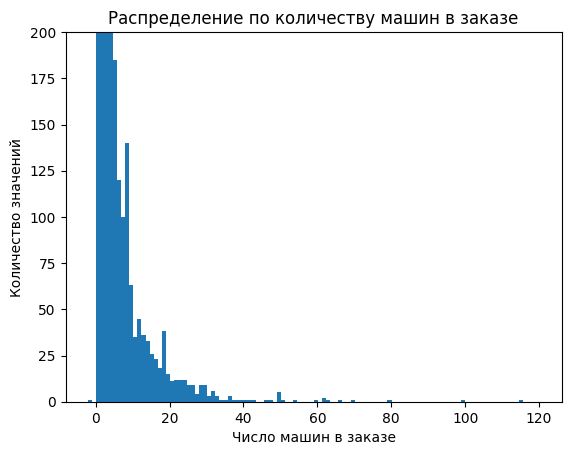

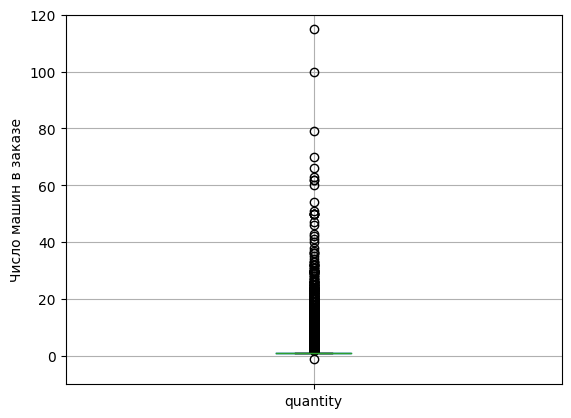

In [ ]:
# построим столбчатую диаграмму
plt.ylim(0,200)
plt.hist(df['quantity'], bins=110, range=(-2,120));
plt.title('Распределение по количеству машин в заказе')
plt.xlabel('Число машин в заказе')
plt.ylabel('Количество значений')
plt.show()

# и график boxplot
plt.ylim(-10,120)
df.boxplot(['quantity']);
plt.ylabel('Число машин в заказе')
plt.show()

👀 Всё, что выше 50 выглядит как выброс. Но можно допустить, что в какие-то месяцы могли быть учтены оптовые продажи, рассмотрим детально:

In [ ]:
df.loc[(df['quantity'] > 50)]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
13699,Allur Auto,Jac,S3,2019,KAZ,NaN,NaN,NaN,NaN,ЭКСПОРТ,70.00,"15,613.95","1,092,976.75",Экспорт область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-03-01
16299,БИПЭК АВТО,Kia,Rio,2019,KAZ,бензин,1.60,автомат,FWD,Алматы,63.00,"13,500.00","850,500.00",Алматинская область,Легковые автомобили,B класс,B,Локальное производство,2019-04-01
16363,БИПЭК АВТО,Kia,Rio,2019,KAZ,бензин,1.60,автомат,FWD,Алматы,60.00,"13,500.00","810,000.00",Алматинская область,Легковые автомобили,B класс,B,Локальное производство,2019-09-01
16858,БИПЭК АВТО,Lada,4x4,2019,KAZ,бензин,1.69,автомат,4WD,Караганда,54.00,"9,000.00","486,000.00",Карагандинская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-04-01
16885,БИПЭК АВТО,Lada,4x4,2019,KAZ,бензин,1.69,автомат,4WD,Тараз,115.00,"9,000.00","1,035,000.00",Жамбылская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-05-01
16968,БИПЭК АВТО,Lada,4x4,2019,KAZ,бензин,1.69,автомат,4WD,Атырау,66.00,"9,000.00","594,000.00",Атырауская область,Внедорожники,Субкомпактные SUV,K1,Локальное производство,2019-08-01
17525,БИПЭК АВТО,Lada,Largus,2019,RUS,бензин,1.60,автомат,FWD,Алматы,51.00,"11,300.00","576,300.00",Алматинская область,Минивэны,Компактвэн,M,Импорт,2019-03-01
25555,БИПЭК АВТО,Skoda,Octavia,2019,KAZ,бензин,1.40,автомат,FWD,Тараз,100.00,"18,700.00","1,870,000.00",Жамбылская область,Легковые автомобили,C класс,C,Локальное производство,2019-07-01
38408,Volkswagen Group Rus,Volkswagen,Polo,<NA>,RUS,NaN,NaN,NaN,NaN,Алматы,79.00,"15,967.85","1,261,459.99",Алматинская область,Легковые автомобили,B класс,B,Импорт,2019-06-01
38423,Volkswagen Group Rus,Volkswagen,Polo,<NA>,RUS,NaN,NaN,NaN,NaN,Алматы,62.00,"15,774.42","978,014.24",Алматинская область,Легковые автомобили,B класс,B,Импорт,2019-08-01


Указанные значения не являются ошибкой ввода данных и явно кореллирует высокой с ценой продажи, оставим.

А что с отрицательным значением?


In [ ]:
df.loc[(df['quantity'] == -1)]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
25728,БИПЭК АВТО,Skoda,Superb,2019,KAZ,бензин,2.00,автомат,4WD,Тараз,-1.00,"35,588.25","-35,588.25",Жамбылская область,Легковые автомобили,D класс,D,Локальное производство,2019-08-01


👀 Ощущение, будто сюда записали бухгалтерские издержки 😏 потому что цена продажи так же отрицательна, как и количество

In [ ]:
# удалим всю строку с -1
df = df.query('quantity != -1')
df['quantity'].min()

1.0

### `price_usd`

Содержит данные о цене авто

In [ ]:
df['price_usd'].describe()

count    39,928.00
mean     28,264.77
std      20,009.33
min       7,100.00
25%      15,518.50
50%      24,285.45
75%      32,505.66
max     328,510.97
Name: price_usd, dtype: float64

👀 Средняя цена заказа (тыс долларов) - 28 264.77, медиана - 24 285.45

Цены выглядят правдоподобно

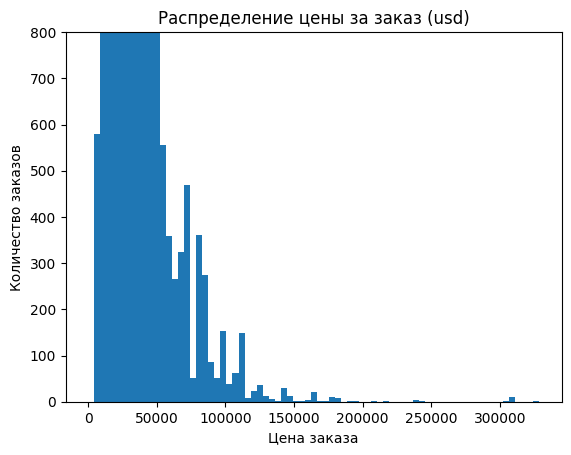

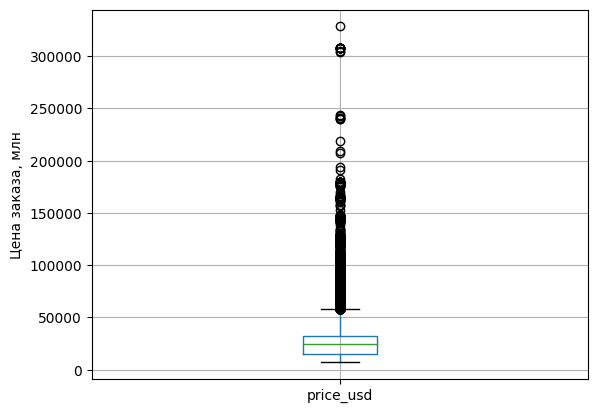

In [ ]:
# построим столбчатую диаграмму
plt.ylim(0,800)
plt.hist(df['price_usd'], bins=75, range=(0,328520));
plt.title('Распределение цены за заказ (usd)')
plt.xlabel('Цена заказа')
plt.ylabel('Количество заказов')
plt.show()

# и график boxplot
df.boxplot(['price_usd']);
plt.ylabel('Цена заказа, млн')
plt.show()

👀 Выбросы удалять не будем

### `sale_usd`

Cодержит данные о цене заказа итог

In [ ]:
df['sale_usd'].describe()

count      39,928.00
mean       33,779.31
std        50,721.17
min             0.00
25%        16,646.06
50%        26,248.96
75%        35,015.43
max     3,778,206.26
Name: sale_usd, dtype: float64

👀 Есть стоимость продажи с 0, посмотрим ближе

In [ ]:
df.loc[(df['sale_usd'] == 0)]

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,eng_car_class,production_loc,sale_date
16741,БИПЭК АВТО,Kia,Sportage,2019,KAZ,бензин,2.00,автомат,4WD,Караганда,NaN,"20,700.00",0.00,Карагандинская область,Внедорожники,Компактные SUV,K1,Локальное производство,2019-08-01
17368,БИПЭК АВТО,Lada,Granta,2019,KAZ,бензин,1.60,автомат,FWD,Алматы,NaN,"7,100.00",0.00,Алматинская область,Легковые автомобили,B класс,B,Локальное производство,2019-08-01
18676,БИПЭК АВТО,Lada,XRAY,2018,KAZ,бензин,1.60,автомат,FWD,Экибастуз,NaN,"13,800.00",0.00,Павлодарская область,Легковые автомобили,B класс,B,Локальное производство,2019-08-01
37416,БИПЭК АВТО,UAZ,3909,2018,KAZ,бензин,2.69,автомат,4WD,Алматы,NaN,"11,200.00",0.00,Алматинская область,Коммерческие автомобили,Развозные автомобили,L2,Локальное производство,2019-08-01
37727,БИПЭК АВТО,UAZ,Patriot,2018,KAZ,бензин,2.69,автомат,4WD,Семей,NaN,"13,800.00",0.00,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV,K2,Локальное производство,2019-08-01
38775,БИПЭК АВТО,Skoda,Kodiaq,2019,KAZ,бензин,2.00,автомат,4WD,Нур-Султан,NaN,"40,000.00",0.00,Акмолинская область,Внедорожники,Полноразмерные SUV,K3,Локальное производство,2019-08-01


👀 Выглядит как ошибка ввода данных, удалим эти строки

In [ ]:
df = df.query('sale_usd != 0')
df['sale_usd'].describe().apply("{0:.2f}".format)

count      39922.00
mean       33784.38
std        50723.29
min         7100.00
25%        16646.06
50%        26248.96
75%        35015.43
max      3778206.26
Name: sale_usd, dtype: object

👀 Стоимость продажи немного отличается от цены. Предположим, что в неё включена не столько стоимость машины, а еще и комплектующих/запчастей

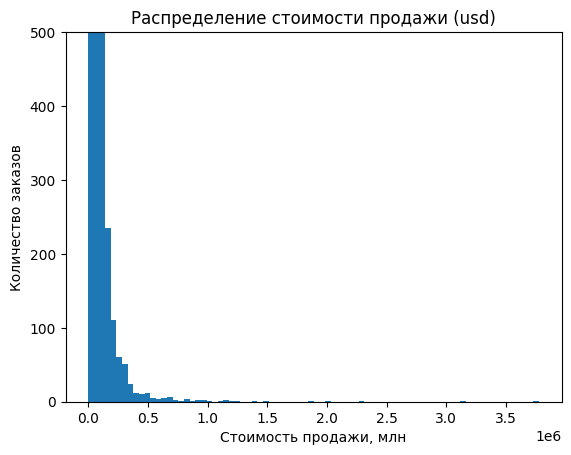

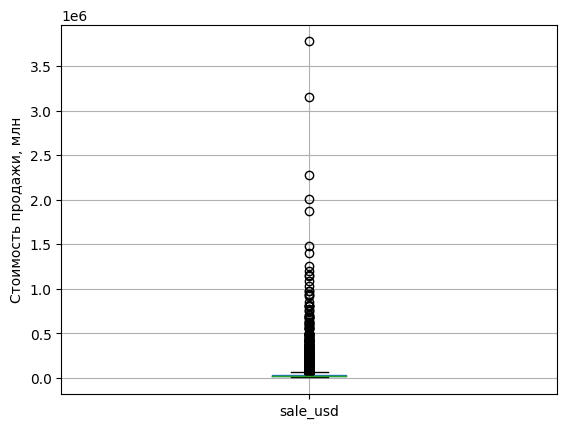

In [ ]:
# построим столбчатую диаграмму
plt.ylim(0,500)
plt.hist(df['sale_usd'], bins=80, range=(0,3778210));
plt.title('Распределение стоимости продажи (usd)')
plt.xlabel('Стоимость продажи, млн')
plt.ylabel('Количество заказов')
plt.show()

# и график boxplot
df.boxplot(['sale_usd']);
plt.ylabel('Стоимость продажи, млн')
plt.show()

👀 Выбросы удалять не будем

### `car_class` и `eng_car_class`

Cодержат данные о классе авто

In [ ]:
df['car_class'].unique()

array(['C класс', 'D класс', 'E класс', 'F класс', 'Среднеразмерные SUV',
       'Полноразмерные SUV', 'Спортивные автомобили', 'Компактные SUV',
       'B класс', 'Субкомпактные SUV', 'Большие автобусы',
       'Крупнотоннажные грузовики', 'Микроавтобусы',
       'Малотоннажные грузовики', 'Среднетоннажные грузовики',
       'Полноразмерный Минивэн', 'Средние автобусы', 'Pick-ups',
       'Развозные автомобили', 'A класс', 'Компактвэн'], dtype=object)

👀 Глянем на похожий столбец 'eng_car_class':

In [ ]:
df['eng_car_class'].unique()

array(['C', 'D', 'E', 'F', 'K2', 'K3', 'G2', 'K1', 'B', 'O', 'L1', 'N',
       'M', 'L2', 'K4', 'A'], dtype=object)

Эту классификацию удалим, столбца 'car_class' достаточно:

In [ ]:
df.drop(['eng_car_class'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,production_loc,sale_date
34122,Toyota Motor Kazakhstan,Toyota,LC Prado,2019,JPN,бензин,2.70,автомат,4WD,Костанай,1.00,"50,259.46","50,259.46",Костанайская область,Внедорожники,Среднеразмерные SUV,Импорт,2019-06-01


Разобъем классы авто по категориям:

|название категории|описание|что сюда отнесем|
| --- | --- | --- |
|A | мини-автомобили|'A класс'|
|B | маленькие автомобили|'B класс'|
|C | среднеразмерные автомобили|'C класс'|
|D | полноразмерные автомобили|'D класс'|
|E | автомобили бизнес-класса|'E класс'|
|F | представительские автомобили|'F класс'|
|S | спортивные купе|'Спортивные автомобили'|
|J | кроссоверы и внедорожники|'Среднеразмерные SUV', 'Полноразмерные SUV', 'Компактные SUV', 'Субкомпактные SUV'|
|M | минивэны и коммерческие автомобили|остальные|

In [ ]:
def correct_class(car_category):
    '''Функция делит автомобили по классам'''
    if car_category == 'A класс':
        result = 'A'
    elif car_category == 'B класс':
        result = 'B'
    elif car_category == 'C класс':
        result = 'C'
    elif car_category == 'D класс':
        result = 'D'
    elif car_category == 'E класс':
        result = 'E'
    elif car_category == 'F класс':
        result = 'F'
    elif car_category == 'Спортивные автомобили':
        result = 'S'
    elif car_category == 'Среднеразмерные SUV':
        result = 'J'
    elif car_category == 'Полноразмерные SUV':
        result = 'J'
    elif car_category == 'Компактные SUV':
        result = 'J'
    elif car_category == 'Субкомпактные SUV':
        result = 'J'
    else:
        result = 'M'
    return result

# применим функцию к столбцу
df['car_class'] = df['car_class'].apply(correct_class)
df['car_class'].unique()

array(['C', 'D', 'E', 'F', 'J', 'S', 'B', 'M', 'A'], dtype=object)

### `production_loc`

Содержит данные о локализации производства

In [ ]:
df['production_loc'].unique()

array(['Импорт', 'Локальное производство'], dtype=object)

👀 Этот столбец не нужен. удалим

In [ ]:
df.drop(['production_loc'], axis= 1 , inplace= True)
df.sample()

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,sale_date
13608,Allur Auto,Jac,S3,2019,KAZ,бензин,1.60,механика,2WD,Усть-Каменогорск,1.00,"12,711.11","12,711.11",Восточно-Казахстанская область,Внедорожники,J,2019-09-01


## 2.3 Индекс строк

In [ ]:
df

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,sale_date
0,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"28,115.00","28,115.00",Алматинская область,Легковые автомобили,C,2019-05-01
1,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"32,246.99","32,246.99",Алматинская область,Легковые автомобили,C,2019-08-01
2,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"32,000.00","32,000.00",Алматинская область,Легковые автомобили,D,2019-04-01
3,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"31,929.00","31,929.00",Алматинская область,Легковые автомобили,D,2019-07-01
4,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"31,929.00","31,929.00",Алматинская область,Легковые автомобили,D,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39962,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39963,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39964,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01


После всех удалений индексы строк могут не совпадать с общим количество строк, поэтому сбросим их

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,sale_date
0,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"28,115.00","28,115.00",Алматинская область,Легковые автомобили,C,2019-05-01
1,Mercur Auto,Audi,A3,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"32,246.99","32,246.99",Алматинская область,Легковые автомобили,C,2019-08-01
2,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"32,000.00","32,000.00",Алматинская область,Легковые автомобили,D,2019-04-01
3,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"31,929.00","31,929.00",Алматинская область,Легковые автомобили,D,2019-07-01
4,Mercur Auto,Audi,A4,2018,DEU,бензин,1.40,автомат,FWD,Алматы,1.00,"31,929.00","31,929.00",Алматинская область,Легковые автомобили,D,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39917,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39918,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39919,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39920,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01


## 2.4 Явные дубликаты

Выше мы уже почистили неявные дубликаты. Посмотрим на явные

In [ ]:
df.duplicated().sum()

23599

👀 Это 59% данных.

Нужно понимать, что для категориальных столбцов наличие дублей - нормальное явление.

Других столбцов, в которых совпадения недопустимы - нет. Если некоторые автоцентры сделают записи о продажах за месяц одних и тех же автомобилей более 2 раз - то мы об этом все равно не узнаем, тк нельзя сравнить по VIN

## 2.5 Пропуски

In [ ]:
# посчитаем количество строк с пропусками
duplicates = df[df.isna().any(axis=1)]
duplicates

,autocenter,car_brand,car_model,release_year,country_manufacturer,fuel_type,engines_displacement,transmission,drive_type,region,quantity,price_usd,sale_usd,district,car_segment,car_class,sale_date
65,Автоцентр-Бавария,BMW,7 серия,<NA>,DEU,бензин,3.00,автомат,4WD,Усть-Каменогорск,1.00,"93,520.28","93,520.28",Восточно-Казахстанская область,Легковые автомобили,F,2019-06-01
861,СемАЗ,Foton,BJ3253DMPKB-AD,2019,KAZ,NaN,NaN,NaN,NaN,Алматы,1.00,"48,275.86","48,275.86",Алматинская область,Коммерческие автомобили,M,2019-03-01
862,СемАЗ,Foton,BJ3253DMPKB-AD,2018,KAZ,NaN,NaN,NaN,NaN,Усть-Каменогорск,1.00,"49,735.92","49,735.92",Восточно-Казахстанская область,Коммерческие автомобили,M,2019-06-01
863,СемАЗ,Foton,BJ3253DMPKB-AD,2018,KAZ,NaN,NaN,NaN,NaN,Кокшетау,1.00,"48,784.39","48,784.39",Акмолинская область,Коммерческие автомобили,M,2019-06-01
864,СемАЗ,Foton,BJ3253DMPKB-AD,2018,KAZ,NaN,NaN,NaN,NaN,Алматы,5.00,"48,725.42","243,627.11",Алматинская область,Коммерческие автомобили,M,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39917,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39918,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39919,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01
39920,ТК КАМАЗ,KAMAZ,58815Z,2019,KAZ,дизель,NaN,механика,NaN,Актобе,1.00,"48,756.92","48,756.92",Актюбинская область,Коммерческие автомобили,M,2019-09-01


👀 Всего 5 121 строк с пропусками. Это 12,8% от всех данных. Нужно расследовать приведет ли их удаление к значительному искажению данных

In [ ]:
# считаем количество пропусков в столбцах
display(df.isna().sum())

# в %
display(pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm'))

autocenter                 0
car_brand                  0
car_model                  0
release_year             501
country_manufacturer       0
fuel_type               3140
engines_displacement    4275
transmission            3259
drive_type              4408
region                     0
quantity                   0
price_usd                  0
sale_usd                   0
district                   0
car_segment                0
car_class                  0
sale_date                  0
dtype: int64

,0
autocenter,0.000000
car_brand,0.000000
car_model,0.000000
release_year,1.000000
country_manufacturer,0.000000
fuel_type,8.000000
engines_displacement,11.000000
transmission,8.000000
drive_type,11.000000
region,0.000000


Предварительно пройдемся по строкам:
- `release_year` - невозможно заполнить год выпуска, тк его не знаем (при удалении потеряем ~1% данных)
- `engines_displacement` - могут иметь неслучайный характер, тк есть электрокары - у них формально нет объема двигателя. Можно знаменить на 0
- `fuel_type`, `transmission`, `drive_type` - у машин в разных комплектациях могут быть разные характеристики. Если заполнить рандомно из интернета или модой, то это может привести к искажению результатов.

Разумнее всего заполнить пропуски заглушками 'unknown'.

Плюсы подхода:
- использование всего набора данных (репрезентативность выборки не страдает)
- явное использование информации о пропущенных значениях



In [ ]:
# начнем с объема двигателя для электрокаров
df.loc[df.fuel_type == 'электро', 'engines_displacement'] = 0

In [ ]:
# удалим пропуски в 'release_year'
df = df.dropna(subset=['release_year'])
df['release_year'].isna().sum()

0

In [ ]:
# Заменим остальные пропуски на заглушку (NaN 👉 'unknown')
def nan_replace(wrong_value, correct_value):
    df['fuel_type'] = df['fuel_type'].replace(wrong_value, correct_value)
    df['engines_displacement'] = df['engines_displacement'].replace(wrong_value, correct_value)
    df['transmission'] = df['transmission'].replace(wrong_value, correct_value)
    df['drive_type'] = df['drive_type'].replace(wrong_value, correct_value)
nan_replace(np.NaN, 'unknown')

# Проверим заполнение
display(df.isna().sum())

autocenter              0
car_brand               0
car_model               0
release_year            0
country_manufacturer    0
fuel_type               0
engines_displacement    0
transmission            0
drive_type              0
region                  0
quantity                0
price_usd               0
sale_usd                0
district                0
car_segment             0
car_class               0
sale_date               0
dtype: int64

## 2.6 Вывод после предобработки данных

- Названия столбцов, для удобочитаемости, привели к snake_case

- Подробно разобрали содержимое столбцов для удаления лишних данных и исправления неявных дублей:

    - `year` и `month`
        - содержит год (2019) и месяц продажи (с января по сентябрь включительно)
        - для удобства объединили `year` + `month` в дату продажи `sale_date` и привели к типу datetime
        - после - `year` и `month` удалили
    - `autocenter` и `dealer_name`  
        - оба содержат названия дилеров и дублируют друг друга, поэтому `dealer_name` удалим
        - объединили неявные дубликаты
    - `car_brand`
        - содержит данные о бренде авто, с ними все в порядке
    - `car_model`
        - содержит данные о модели авто, исправили пробелы
    - `car_modification`
        - содержит данные о комплектации авто, удален
    - `release_year`
        - содержит год производства авто
        - исправлен неразрывный пробел и переведен в тип Int
    - `country_manufacturer`
        - содержит данные о стране-производителе
        - привели в единый краткий формат Alpha3
    - `fuel_type`
        - содержит данные о типе топлива
        - разделили на категории: бензин, дизель, электро, гибрид  
        - удалили данные, съехавшие из других столбцов
    - `engines_displacement`
        - содержит данные об объеме двигателя
        - #Н/Д заменили на nan
        - привели к типу float  
        - удалили аномальные авто с движком больше 13 литров        
    - `transmission`
        - содержит данные о коробке передач. Поделили на категории: механика	и автомат
    - `drive_type`
        - содержит данные о типе привода
        - '#Н/Д', 'Астана' и '0' заменили на nan  
        - поделили значения на категории: FWD, 4WD, RWD, 2WD
    - `segment` и `car_segment`
        - содержит данные о сегменте авто
        - в `car_segment` те же данные, но более структурированные
        - столбец `segment` удален
    - `region` и `district`
        - содержит данные о регионе и области продажи
        - скорректированы некоторые области
    - `client_type`
        - содержит данные о типе клиента (юл/фл), удален
    - `payment_method`
        - содержит данные о форме расчета, удален
    - `quantity`
        - содержит данные о количестве авто в заказе
        - оставили выбросы, среднее - 1-2 машины в заказе
        - удалена строка с отрицательным значением
    - `price_usd`
        - содержит данные о цене авто
        - среднее - 28.3k долларов, медиана - 24.3k
    - `sale_usd`
        - содержит данные о цене заказа итог
        - среднее - 33.8k долларов, медиана - 26.2k
        - удалены строки с 0, выбросы оставлены
    - `car_class` и `eng_car_class`
        -  содержит данные о классе авто
        - `eng_car_class` похожий столбец, удален
        - данные разнесены по категориям: A, B, C, D, E, F, S, J, M   
    - `production_loc`
        - содержит данные о локализации производства, удален

- Сбросили индексацию строк после удаления данных

- Проверили явные дубликаты

- Всего 5 121 строк с пропусками (12,8%):

    - в `release_year` - удалены
    - `engines_displacement` заменили пропуски на 0 для электрокаров
    - `fuel_type`, `transmission`, `drive_type` и остальное в `engines_displacement` заменили на заглушку 'unknown'

# 3 Анализ рынка

## 3.1 Самые популярные бренды


### по заказам

In [ ]:
# подготовим таблицу по количеству заказов
brand_count = df.groupby('car_brand')[['car_brand']].count()
brand_count.columns = ['orders']
brand_count = brand_count.reset_index().sort_values(by='orders', ascending=False)

# добавим долю в %
brand_count['orders_percent'] = round(brand_count['orders'] /
                                      brand_count['orders'].sum() * 100,2)

# оставим топ-10 брендов
brand_count = brand_count.head(10)
brand_count

,car_brand,orders,orders_percent
40,Toyota,10745,27.26
11,Hyundai,10168,25.79
20,Lada,1967,4.99
9,GAZ,1821,4.62
34,Ravon,1784,4.53
16,Jac,1770,4.49
35,Renault,1759,4.46
22,Lexus,1206,3.06
31,Nissan,1053,2.67
41,UAZ,925,2.35


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(brand_count.sort_values(by='orders', ascending=False),
             x='car_brand',
             y='orders',
             text_auto='.3s',
             width=950, height=450,
             text='orders_percent',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Количество заказов по брендам авто',
                   xaxis_title='Бренды',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Топ-5 брендов по количеству заказов:
- Toyota	- 10.7k (27.26%)
- Hyundai	- 10.2k (25.79%)
- Lada	- 1.97k (4.99%)
- GAZ	- 1.82k (4.62%)
- Ravon	- 1.78k (4.53%)

### по сумме заказов

In [ ]:
# подготовим таблицу по сумме заказов
brand_sale = (df.pivot_table(index=['car_brand'], values='sale_usd', aggfunc='sum')
                .reset_index()
                .rename(columns={'sale_usd' : 'sale_sum'})
                .sort_values(by='sale_sum', ascending=False))

# добавим долю в %
brand_sale['sale_sum_percent'] = round(brand_sale['sale_sum'] /
                                       brand_sale['sale_sum'].sum() * 100,2)
# оставим топ-10 брендов
brand_sale = brand_sale.head(10)
brand_sale

,car_brand,sale_sum,sale_sum_percent
40,Toyota,"402,500,067.91",30.43
11,Hyundai,"229,307,596.10",17.34
20,Lada,"107,847,478.95",8.15
22,Lexus,"77,376,371.52",5.85
18,KAMAZ,"46,092,683.39",3.49
19,Kia,"45,669,700.00",3.45
31,Nissan,"40,012,772.49",3.03
9,GAZ,"32,286,199.16",2.44
0,ANKAI,"28,907,055.44",2.19
2,BMW,"28,642,248.09",2.17


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(brand_sale.sort_values(by='sale_sum', ascending=False),
             x='car_brand',
             y='sale_sum',
             text_auto='.4s',
             width=950, height=450,
             text='sale_sum_percent',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Стоимость заказов по брендам авто',
                   xaxis_title='Бренды',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Топ-5 брендов по сумме заказов:
- Toyota	- 402.5M (30.43%)
- Hyundai	- 229.3M (17.34%)
- Lada	- 107.8M (8.15%)
- Lexus	- 77.38M (5.85%)
- KAMAZ - 46.09M (3.49%)

## 3.2 Продажи всех брендов

### всего продано машин

In [ ]:
df['quantity'].sum()

52676.0

👀 Всего продали 52 676 машин

### всего сумма продаж

In [ ]:
df['sale_usd'].sum()

1322586301.945543

👀 Общая сумма продаж 1.323 млрд. долларов

## 3.3 Динамика продаж

### по заказам

In [ ]:
# подготовим таблицу по количеству заказов
date_count = df.groupby('sale_date')[['sale_date']].count()
date_count.columns = ['orders']
date_count = date_count.reset_index().sort_values(by='orders', ascending=False)
date_count

,sale_date,orders
6,2019-07-01,5882
8,2019-09-01,5294
7,2019-08-01,4781
5,2019-06-01,4706
4,2019-05-01,4539
3,2019-04-01,4110
2,2019-03-01,3637
0,2019-01-01,3347
1,2019-02-01,3125


In [ ]:
# рисуем диаграмму
fig = px.bar(date_count.sort_values(by='sale_date'),
             x='sale_date',
             y='orders',
             width=950, height=600,
             text='orders',
             color='orders',
             color_continuous_scale='teal')

fig.update_layout(title='Динамика по количеству заказов по месяцам',
                   xaxis_title='Месяц',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Количество заказов по месяцам:
- больше всего - лето и начало осени - в июле (5 882) и сентябре - (5 294)
- меньше всего - зима - в январе (3 347), феврале (3 125)
- прослеживается сезонность спроса

### по сумме заказов

In [ ]:
# подготовим таблицу по сумме заказов
date_sales = (df.pivot_table(index=['sale_date'], values='sale_usd', aggfunc='sum')
                .reset_index()
                .sort_values(by='sale_usd'))
date_sales

,sale_date,sale_usd
1,2019-02-01,"109,590,908.65"
0,2019-01-01,"113,413,630.41"
2,2019-03-01,"127,266,484.45"
3,2019-04-01,"144,383,612.94"
7,2019-08-01,"153,465,967.80"
4,2019-05-01,"157,269,149.50"
5,2019-06-01,"157,801,220.86"
8,2019-09-01,"159,386,318.78"
6,2019-07-01,"200,009,008.57"


In [ ]:
# рисуем диаграмму
fig = px.bar(date_sales.sort_values(by='sale_date'),
             x='sale_date',
             y='sale_usd',
             text_auto='.4s',
             width=950, height=600,
             text='sale_usd',
             color='sale_usd',
             color_continuous_scale='teal')

fig.update_layout(title='Динамика по сумме продаж по месяцам',
                   xaxis_title='Месяц',
                   yaxis_title='Сумма продаж',
                   showlegend=False)

fig.show()

👀 Сумма продаж по месяцам:
- больше всего - в июле (200М)
- меньше всего - в январе (113.4М), феврале (109.6М)

## 3.4 Динамика продаж по категориям

### 3.4.1 Тип топлива

#### по заказам

In [ ]:
# посмотрим типы топлива по количеству заказов
count_by_fuel = (df.groupby('fuel_type')
                   .agg({'autocenter': 'count'})
                   .reset_index()
                   .rename(columns={'autocenter' : 'orders'})
                   .sort_values(by='orders', ascending=False))

# исключим 'unknown'
count_by_fuel = count_by_fuel.query('fuel_type != "unknown"')

# добавим долю в %
count_by_fuel['orders_percent'] = round(count_by_fuel['orders'] / count_by_fuel['orders'].sum() * 100,2)
count_by_fuel

,fuel_type,orders,orders_percent
1,бензин,34899,95.09
3,дизель,1778,4.84
4,электро,13,0.04
2,гибрид,10,0.03


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(count_by_fuel.sort_values(by='orders', ascending=False),
             x='fuel_type',
             y='orders',
             text_auto='.3s',
             width=950, height=450,
             text='orders_percent',
             color='fuel_type',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общее количество заказов по типам топлива',
                   xaxis_title='Тип топлива',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по типам топлива:
- подавляющее большинство - бензин (34.9k	- 95.09%)
- дизель (1.78k - 4.84%)
- меньше всего - электро (13 - 0.04%) и гибрид (10 - 0.03%)

In [ ]:
# подготовим таблицу с разбивкой по датам
date_count_by_fuel = (df.pivot_table(index=['sale_date', 'fuel_type'], values='autocenter', aggfunc='count')
                        .reset_index()
                        .sort_values(by='sale_date'))
# исключим 'unknown'
date_count_by_fuel = date_count_by_fuel.query('fuel_type != "unknown"')

# рисуем диаграмму
fig = px.bar(date_count_by_fuel.sort_values(by='fuel_type', ascending=False),
                x='sale_date',
                y='autocenter',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='fuel_type',
                title='Динамика количества заказов по типам топлива',
                labels={'autocenter':'Количество заказов', 'sale_date':'Месяц', 'fuel_type':'Тип топлива'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Количество заказов по типам топлива в динамике:
- больше всего заказов - июль (бензин - 5.15k, дизель - 441)
- меньше - февраль (бензин - 2.74k, дизель - 94)

#### по сумме заказов

In [ ]:
# посмотрим типы топлива по сумме продаж
sale_by_fuel = (df.groupby('fuel_type')
                  .agg({'sale_usd': 'sum'})
                  .reset_index()
                  .rename(columns={'sale_usd' : 'fuel_type_sale'})
                  .sort_values(by='fuel_type_sale', ascending=False))
# исключим 'unknown'
sale_by_fuel = sale_by_fuel.query('fuel_type != "unknown"')

# добавим долю в %
sale_by_fuel['fuel_type_percent'] = round(sale_by_fuel['fuel_type_sale'] /
                                          sale_by_fuel['fuel_type_sale'].sum() * 100,2)
sale_by_fuel

,fuel_type,fuel_type_sale,fuel_type_percent
1,бензин,"1,137,935,393.30",90.99
3,дизель,"108,627,164.32",8.69
4,электро,"3,422,902.68",0.27
2,гибрид,"614,939.02",0.05


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(sale_by_fuel.sort_values(by='fuel_type_sale', ascending=False),
             x='fuel_type',
             y='fuel_type_sale',
             text_auto='.4s',
             width=950, height=450,
             text='fuel_type_percent',
             color='fuel_type',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общая сумма заказов по типам топлива',
                   xaxis_title='Тип топлива',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Общая сумма заказов по типам топлива:
- подавляющее большинство - бензин (1.138G	- 90.99%)
- дизель (108.6M - 8.69%)
- меньше всего - электро (3.423M - 0.27%) и гибрид (614.9k - 0.05%)

In [ ]:
# подготовим таблицу с разбивкой по датам
date_sales_by_fuel = (df.pivot_table(index=['sale_date', 'fuel_type'], values='sale_usd', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='sale_date'))
# исключим 'unknown'
date_sales_by_fuel = date_sales_by_fuel.query('fuel_type != "unknown"')

# рисуем диаграмму
fig = px.bar(date_sales_by_fuel.sort_values(by='fuel_type', ascending=False),
                x='sale_date',
                y='sale_usd',
                text_auto='.4s',
                width=970, height=600,
                barmode = 'stack',
                color='fuel_type',
                title='Динамика суммы заказов по типам топлива',
                labels={'sale_usd':'Сумма заказов', 'sale_date':'Месяц', 'fuel_type':'Типы топлива'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Сумма заказов по типам топлива в динамике:
- больше всего сумма заказов - июль (бензин - 155.6M, дизель - 35.21М)
- меньше - февраль (бензин - 99.07M, дизель - 5.9М)

### 3.4.2 Класс

#### по заказам

In [ ]:
# посмотрим классы авто по количеству заказов
count_by_car_class = (df.groupby('car_class')
                        .agg({'autocenter': 'count'})
                        .reset_index()
                        .rename(columns={'autocenter' : 'orders'})
                        .sort_values(by='orders', ascending=False))

# добавим долю в %
count_by_car_class['orders_percent'] = round(count_by_car_class['orders'] / count_by_car_class['orders'].sum() * 100,2)
count_by_car_class

,car_class,orders,orders_percent
6,J,17545,44.51
1,B,6984,17.72
7,M,5605,14.22
3,D,5374,13.63
2,C,3579,9.08
4,E,244,0.62
0,A,42,0.11
5,F,38,0.10
8,S,10,0.03


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(count_by_car_class.sort_values(by='orders', ascending=False),
             x='car_class',
             y='orders',
             text_auto='.3s',
             width=950, height=450,
             text='orders_percent',
             color='car_class',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общее количество заказов по классам авто',
                   xaxis_title='Класс авто',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по классам авто:
- больше всего - J (17.5k	- 44.51%)
- C, D, M, B (от 3.58k до 6.98k)
- меньше всего - S, F, A, E (от 10 до 244)

In [ ]:
# подготовим таблицу
date_count_by_class = (df.pivot_table(index=['sale_date', 'car_class'], values='autocenter', aggfunc='count')
                        .reset_index()
                        .sort_values(by='sale_date'))

# рисуем диаграмму
fig = px.bar(date_count_by_class.sort_values(by='car_class', ascending=False),
                x='sale_date',
                y='autocenter',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='car_class',
                title='Динамика количества заказов по классам авто',
                labels={'autocenter':'Количество заказов', 'sale_date':'Месяц', 'car_class':'Классы авто'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Количество заказов по классам авто в динамике:
- больше всего заказов - июль (J - 2.86k)
- меньше - февраль (J - 1.47k)

#### по сумме заказов

In [ ]:
# посмотрим классы авто по сумме заказов
sale_by_car_class = (df.groupby('car_class')
                       .agg({'sale_usd': 'sum'})
                       .reset_index()
                       .rename(columns={'sale_usd' : 'sale_usd_sum'})
                       .sort_values(by='sale_usd_sum', ascending=False))

# добавим долю в %
sale_by_car_class['car_class_percent'] = (round(sale_by_car_class['sale_usd_sum'] /
                                                sale_by_car_class['sale_usd_sum'].sum() * 100,2))
sale_by_car_class

,car_class,sale_usd_sum,car_class_percent
6,J,"651,517,081.52",49.26
7,M,"232,448,261.26",17.58
3,D,"176,626,389.47",13.35
1,B,"152,709,607.61",11.55
2,C,"90,832,594.55",6.87
4,E,"12,135,090.94",0.92
5,F,"4,548,915.47",0.34
8,S,"932,826.82",0.07
0,A,"835,534.31",0.06


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(sale_by_car_class.sort_values(by='sale_usd_sum', ascending=False),
             x='car_class',
             y='sale_usd_sum',
             text_auto='.4s',
             width=950, height=450,
             text='car_class_percent',
             color='car_class',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общая сумма заказов по классам авто',
                   xaxis_title='Класс авто',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Общая сумма заказов по классам авто:
- большинство - J (651.5М - 49.26%)
- C, B, D, M (от 90.83M до 232.4М)
- меньше всего - A, S, F, E (от 835.5k до 12.14M)

In [ ]:
# подготовим таблицу с разбивкой по датам
date_sale_by_class = (df.pivot_table(index=['sale_date', 'car_class'], values='sale_usd', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='sale_date'))

# рисуем диаграмму
fig = px.bar(date_sale_by_class.sort_values(by='car_class', ascending=False),
                x='sale_date',
                y='sale_usd',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='car_class',
                title='Динамика суммы заказов по классам авто',
                labels={'sale_usd':'Сумма заказов', 'sale_date':'Месяц', 'car_class':'Классы авто'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Сумма заказов по классам авто в динамике:
- больше всего сумма заказов - июль (J - 88.4M)
- меньше - февраль (J - 61.1M)

### 3.4.3 Сегмент

#### по заказам

In [ ]:
# посмотрим сегменты авто по кол-ву заказов
count_by_segment = (df.groupby('car_segment')
                      .agg({'autocenter': 'count'})
                      .reset_index()
                      .rename(columns={'autocenter' : 'orders'})
                      .sort_values(by='orders', ascending=False))

# добавим долю в %
count_by_segment['orders_percent'] = round(count_by_segment['orders'] /
                                           count_by_segment['orders'].sum() * 100,2)
count_by_segment

,car_segment,orders,orders_percent
0,Внедорожники,17545,44.51
2,Легковые автомобили,16271,41.27
1,Коммерческие автомобили,4233,10.74
4,Пикапы,973,2.47
3,Минивэны,399,1.01


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(count_by_segment.sort_values(by='orders', ascending=False),
             x='car_segment',
             y='orders',
             text_auto='.3s',
             width=950, height=450,
             text='orders_percent',
             color='car_segment',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общее количество заказов по сегментам авто',
                   xaxis_title='Сегмент авто',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по сегментам авто:
- больше всего - внедорожники (17.5k - 44.51%) и легковые (16.3k - 41.27%)
- коммерческие авто (4.23k - 10.74%)
- меньше всего - пикапы (973 - 2.47%) и минивэны (399 - 1.01%)

In [ ]:
# подготовим таблицу с разбивкой по датам
date_count_by_segment = (df.pivot_table(index=['sale_date', 'car_segment'], values='autocenter', aggfunc='count')
                           .reset_index()
                           .sort_values(by='sale_date'))

# рисуем диаграмму
fig = px.bar(date_count_by_segment.sort_values(by='car_segment', ascending=False),
                x='sale_date',
                y='autocenter',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='car_segment',
                title='Динамика количества заказов по сегментам авто',
                labels={'autocenter':'Количество заказов', 'sale_date':'Месяц', 'car_segment':'Сегменты авто'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Количество заказов по сегментам авто в динамике:
- больше всего заказов - июль (внедорожники - 2.86k, легковые - 2.22k)
- меньше - февраль (внедорожники - 1.47k, легковые - 1.17k)

#### по сумме заказов

In [ ]:
# посмотрим сегменты авто по сумме заказов
sale_by_segment = (df.groupby('car_segment')
                     .agg({'sale_usd': 'sum'})
                     .reset_index()
                     .rename(columns={'sale_usd' : 'sale_usd_sum'})
                     .sort_values(by='sale_usd_sum', ascending=False))

# добавим долю в %
sale_by_segment['car_segment_percent'] = (round(sale_by_segment['sale_usd_sum'] /
                                                sale_by_segment['sale_usd_sum'].sum() * 100, 2))
sale_by_segment

,car_segment,sale_usd_sum,car_segment_percent
0,Внедорожники,"651,517,081.52",49.26
2,Легковые автомобили,"438,620,959.17",33.16
1,Коммерческие автомобили,"180,886,737.60",13.68
4,Пикапы,"28,975,162.94",2.19
3,Минивэны,"22,586,360.72",1.71


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(sale_by_segment.sort_values(by='sale_usd_sum', ascending=False),
             x='car_segment',
             y='sale_usd_sum',
             text_auto='.4s',
             width=950, height=450,
             text='car_segment_percent',
             color='car_segment',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общая сумма заказов по сегментам авто',
                   xaxis_title='Сегмент авто',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по сегментам авто:
- больше всего - внедорожники (651.5М - 49.26%)
- легковые (438.6М - 33.16%) и коммерческие (180.9М - 13.68%)
- меньше всего - пикапы (28.98М - 2.19%) и минивэны (22.59М - 1.71%)

In [ ]:
# подготовим таблицу с разбивкой по датам
date_sale_by_segment = (df.pivot_table(index=['sale_date', 'car_segment'], values='sale_usd', aggfunc='sum')
                          .reset_index()
                          .sort_values(by='sale_date'))

# рисуем диаграмму
fig = px.bar(date_sale_by_segment.sort_values(by='car_segment', ascending=False),
                x='sale_date',
                y='sale_usd',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='car_segment',
                title='Динамика по сумме заказов по сегментам авто',
                labels={'sale_usd':'Сумма заказов', 'sale_date':'Месяц', 'car_segment':'Сегменты авто'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Сумма заказов по классам авто в динамике:
- больше всего сумма заказов - июль (внедорожники - 88.4M, легковые - 62.3M)
- также в июле заметен прирост коммерческих авто - до 44.5М (почти в 2 раза больше по сравнению с средним)
- меньше - февраль (внедорожники - 61.1М, легковые - 32.8М)

## 3.5 Продажи по регионам

### по заказам

In [ ]:
# посмотрим регионы по кол-ву заказов
count_by_region = (df.groupby('region')
                       .agg({'autocenter': 'count'})
                       .reset_index()
                       .rename(columns={'autocenter' : 'orders'})
                       .sort_values(by='orders', ascending=False))

# добавим долю в %
count_by_region['orders_percent'] = round(count_by_region['orders'] /
                                          count_by_region['orders'].sum() * 100,2)
count_by_region

,region,orders,orders_percent
2,Алматы,11049,28.03
11,Нур-Султан,8177,20.74
23,Шымкент,2869,7.28
8,Костанай,2422,6.14
3,Атырау,2148,5.45
5,Караганда,2024,5.13
24,ЭКСПОРТ,1589,4.03
0,Актау,1495,3.79
21,Уральск,1480,3.75
1,Актобе,1351,3.43


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(count_by_region.sort_values(by='orders', ascending=False),
             x='region',
             y='orders',
             text_auto='.3s',
             width=990, height=700,
             text='orders_percent',
             color='region',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общее количество заказов по регионам',
                   xaxis_title='Регион',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по регионам:
- топ-2 - Алматы (11k - 28.03%) и Нур-Султан (8.18k - 20.74%)
- далее - Шымкент (2.87k - 7.28%), Костанай (2.42k - 6.14%), Атырау (2.15k - 5.45%)

### по сумме заказов

In [ ]:
# посмотрим регионы по сумме заказов
sales_by_region = (df.groupby('region')
                     .agg({'sale_usd': 'sum'})
                     .reset_index()
                     .rename(columns={'sale_usd' : 'sale_usd_sum'})
                     .sort_values(by='sale_usd_sum', ascending=False))

# добавим долю в %
sales_by_region['sale_usd_percent'] = (sales_by_region['sale_usd_sum'] /
                                       sales_by_region['sale_usd_sum'].sum() * 100)
sales_by_region

,region,sale_usd_sum,sale_usd_percent
2,Алматы,"416,143,835.68",31.46
11,Нур-Султан,"288,004,300.20",21.78
8,Костанай,"85,464,273.94",6.46
23,Шымкент,"81,699,254.44",6.18
3,Атырау,"73,010,279.18",5.52
5,Караганда,"56,566,080.23",4.28
0,Актау,"46,727,491.50",3.53
21,Уральск,"44,793,705.93",3.39
1,Актобе,"44,215,177.52",3.34
22,Усть-Каменогорск,"40,599,665.65",3.07


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(sales_by_region.sort_values(by='sale_usd_sum', ascending=False),
             x='region',
             y='sale_usd_sum',
             text_auto='.4s',
             width=990, height=700,
             text='sale_usd_percent',
             color='region',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общая сумма заказов по регионам',
                   xaxis_title='Регион',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Общая сумма заказов по регионам:
- топ-2 - Алматы (416.1М - 31.46%) и Нур-Султан (288.0М - 21.78%)
- далее - Костанай (85.46М - 6.46%), Шымкент (81.70М - 6.18%), Атырау (73.01М - 5.52%)

## 3.6 Продажи по автоцентрам

### по заказам

In [ ]:
# выведем автоцентры и кол-во их заказов
count_by_autocenter = (df.groupby('autocenter')
                         .agg({'car_brand': 'count'})
                         .reset_index()
                         .rename(columns={'car_brand' : 'orders'})
                         .sort_values(by='orders', ascending=False))

# добавим долю в %
count_by_autocenter['orders_percent'] = round(count_by_autocenter['orders'] /
                                              count_by_autocenter['orders'].sum() * 100, 2)
count_by_autocenter

,autocenter,orders,orders_percent
15,Toyota Motor Kazakhstan,11951,30.32
2,Astana Motors,10169,25.80
22,БИПЭК АВТО,3617,9.18
23,Вираж,2909,7.38
0,Allur Auto,2305,5.85
10,Renault Россия,1759,4.46
27,Равон Моторс Казахстан,1506,3.82
9,Nissan Manufacturing RUS,1149,2.91
30,ТК КАМАЗ,893,2.27
8,Mercur Auto,643,1.63


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(count_by_autocenter.sort_values(by='orders', ascending=False),
             x='autocenter',
             y='orders',
             text_auto='.3s',
             width=990, height=700,
             text='orders_percent',
             color='autocenter',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Общее количество заказов по автоцентрам',
                   xaxis_title='Автоцентр',
                   yaxis_title='Количество заказов',
                   showlegend=False)

fig.show()

👀 Общее количество заказов по автоцентрам:
- топ-2 - Toyota Motor Kazakhstan	(12.0k -	30.32%), Astana Motors (10.2k -	25.80%)
- далее - БИПЭК АВТО (3.62k - 9.18%), Вираж (2.91k - 7.38%), Allur Auto	(2.31k - 5.85%)

### по сумме заказов

In [ ]:
# посчитаем сумму продаж по дилерам
sales_by_autocenter = (df.groupby('autocenter')
                         .agg({'sale_usd': 'sum'})
                         .reset_index()
                         .rename(columns={'sale_usd' : 'sale_usd_sum'})
                         .sort_values(by='sale_usd_sum', ascending=False))

# добавим долю в %
sales_by_autocenter['sale_usd_sum_percent'] = round(sales_by_autocenter['sale_usd_sum'] /
                                                  sales_by_autocenter['sale_usd_sum'].sum() * 100, 2)
sales_by_autocenter

,autocenter,sale_usd_sum,sale_usd_sum_percent
15,Toyota Motor Kazakhstan,"479,876,439.43",36.28
2,Astana Motors,"229,338,604.06",17.34
22,БИПЭК АВТО,"186,017,769.70",14.06
0,Allur Auto,"63,661,797.37",4.81
9,Nissan Manufacturing RUS,"46,289,495.68",3.50
30,ТК КАМАЗ,"46,215,934.55",3.49
23,Вираж,"46,124,756.28",3.49
21,Автоцентр-Бавария,"29,126,201.04",2.20
10,Renault Россия,"23,730,534.19",1.79
8,Mercur Auto,"19,355,275.98",1.46


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(sales_by_autocenter.sort_values(by='sale_usd_sum', ascending=False),
             x='autocenter',
             y='sale_usd_sum',
             text_auto='.4s',
             width=990, height=700,
             text='sale_usd_sum_percent',
             color='autocenter',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Доля рынка дилеров по сумме заказов',
                   xaxis_title='Автоцентр',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Общая сумма заказов по автоцентрам:
- топ-3 - Toyota Motor Kazakhstan	(479.9M - 36.28%), Astana Motors (229.3M - 17.34%), БИПЭК АВТО (186.0M - 14.06%)
- далее - Allur Auto (63.66M - 4.81%), Nissan Manufacturing RUS (46.29M - 3.5%)

## 3.7 Выделим самый продаваемый

### бренд

In [ ]:
# посчитаем сумму заказов
sales_brand_pivot = (df.pivot_table(index=['car_brand'], values='sale_usd', aggfunc='sum')
                       .reset_index()
                       .rename(columns={'sale_usd' : 'sales'})
                       .sort_values(by='sales', ascending=False))
sales_brand_pivot.head()

,car_brand,sales
40,Toyota,"402,500,067.91"
11,Hyundai,"229,307,596.10"
20,Lada,"107,847,478.95"
22,Lexus,"77,376,371.52"
18,KAMAZ,"46,092,683.39"


In [ ]:
# посчитаем количество заказов
orders_brand_pivot = (df.pivot_table(index=['car_brand'], values='autocenter', aggfunc='count')
                        .reset_index()
                        .rename(columns={'autocenter' : 'orders'})
                        .sort_values(by='orders', ascending=False))
orders_brand_pivot.head()

,car_brand,orders
40,Toyota,10745
11,Hyundai,10168
20,Lada,1967
9,GAZ,1821
34,Ravon,1784


In [ ]:
# посчитаем количество проданных машин
quantity_brand_pivot = (df.pivot_table(index=['car_brand'], values='quantity', aggfunc='sum')
                          .reset_index()
                          .rename(columns={'quantity' : 'cars'})
                          .sort_values(by='cars', ascending=False))
quantity_brand_pivot.head()

,car_brand,cars
20,Lada,"11,092.00"
40,Toyota,"10,745.00"
11,Hyundai,"10,168.00"
19,Kia,"2,358.00"
16,Jac,"1,878.00"


In [ ]:
# соединим все таблицы
total_brands = (sales_brand_pivot.merge(orders_brand_pivot, on='car_brand', how='left')
                                 .merge(quantity_brand_pivot, on='car_brand', how='left'))

# добавим среднюю сумму продажи за заказ
total_brands['sales_per_order'] = total_brands['sales'] / total_brands['orders']

# оставим топ-5 брендов по количеству проданных авто
total_brands = total_brands.head()
total_brands

,car_brand,sales,orders,cars,sales_per_order
0,Toyota,"402,500,067.91",10745,"10,745.00","37,459.29"
1,Hyundai,"229,307,596.10",10168,"10,168.00","22,551.89"
2,Lada,"107,847,478.95",1967,"11,092.00","54,828.41"
3,Lexus,"77,376,371.52",1206,"1,206.00","64,159.51"
4,KAMAZ,"46,092,683.39",892,892.00,"51,673.41"


In [ ]:
# построим столбчатую диаграмму по количеству проданных авто по брендам
fig = px.bar(total_brands.sort_values(by='cars', ascending=False),
             x='car_brand',
             y='cars',
             text_auto='.3s',
             width=950, height=450,
             text='cars',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Количество проданных авто по брендам',
                   xaxis_title='Топ-5 брендов',
                   yaxis_title='Количество проданных авто',
                   showlegend=False)

fig.show()

In [ ]:
# построим столбчатую диаграмму по средней стоимости заказа
fig = px.bar(total_brands.sort_values(by='sales_per_order', ascending=False),
             x='car_brand',
             y='sales_per_order',
             text_auto='.3s',
             width=950, height=450,
             text='sales_per_order',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Средняя стоимость заказа по брендам',
                   xaxis_title='Топ-5 брендов',
                   yaxis_title='Средняя стоимость заказа',
                   showlegend=False)

fig.show()

👀 Примечательно, что:
- Toyota и Hyundai - самые популярные бренды по количеству заказов и сумме продаж
- Однако общее количество проданных машин у Lada выше (11.1k против 10.7k у Toyota и 10.2k у Hyundai)
- Средняя стоимость заказа у Lada так же больше (54.8k против 37.5k у Toyota и 22.6k у Hyundai)
- выходит, одним заказом покупают сразу несколько автомобилей Lada, хотя этих заказов гораздо меньше, чем у Toyota и Hyundai

Это по праву делает Lada самым покупаемым брендом по количеству проданных авто.

Далее мы выясним какая модель Lada стала самой продаваемой


### автомобиль

In [ ]:
# оформим таблицу, оставим только самый продаваемый бренд - Lada
sales_model = df.loc[df['car_brand'] == 'Lada']

# отсортируем модели Lada по сумме продаж
sales_model_pivot = (sales_model.pivot_table(index=['car_model'], values='sale_usd', aggfunc='sum')
                                .reset_index()
                                .rename(columns={'sale_usd' : 'sales'})
                                .sort_values(by='sales', ascending=False))
sales_model_pivot

,car_model,sales
4,Vesta,"31,116,273.68"
1,Granta,"26,671,905.26"
0,4x4,"22,338,600.00"
3,Largus,"19,173,200.00"
5,XRAY,"8,276,800.00"
6,ВИС,"244,000.00"
2,Kalina,"26,700.00"


In [ ]:
# посчитаем количество заказов
orders_model_pivot = (sales_model.pivot_table(index=['car_model'], values='autocenter', aggfunc='count')
                                 .reset_index()
                                 .rename(columns={'autocenter' : 'orders'})
                                 .sort_values(by='orders', ascending=False))
orders_model_pivot

,car_model,orders
4,Vesta,627
1,Granta,462
5,XRAY,343
3,Largus,266
0,4x4,251
6,ВИС,15
2,Kalina,3


In [ ]:
# посчитаем количество проданных машин
quantity_model_pivot = (sales_model.pivot_table(index=['car_model'], values='quantity', aggfunc='sum')
                                   .reset_index()
                                   .rename(columns={'quantity' : 'cars'})
                                   .sort_values(by='cars', ascending=False))
quantity_model_pivot

,car_model,cars
1,Granta,"3,664.00"
4,Vesta,"2,653.00"
0,4x4,"2,469.00"
3,Largus,"1,683.00"
5,XRAY,602.00
6,ВИС,18.00
2,Kalina,3.00


In [ ]:
# соединим все таблицы
total_models = (sales_model_pivot.merge(orders_model_pivot, on='car_model', how='left')
                                 .merge(quantity_model_pivot, on='car_model', how='left'))

# добавим среднюю сумму продажи за заказ
total_models['sales_per_order'] = total_models['sales'] / total_models['orders']
total_models

,car_model,sales,orders,cars,sales_per_order
0,Vesta,"31,116,273.68",627,"2,653.00","49,627.23"
1,Granta,"26,671,905.26",462,"3,664.00","57,731.40"
2,4x4,"22,338,600.00",251,"2,469.00","88,998.41"
3,Largus,"19,173,200.00",266,"1,683.00","72,079.70"
4,XRAY,"8,276,800.00",343,602.00,"24,130.61"
5,ВИС,"244,000.00",15,18.00,"16,266.67"
6,Kalina,"26,700.00",3,3.00,"8,900.00"


In [ ]:
# построим столбчатую диаграмму Количество проданных Lada по моделям
fig = px.bar(total_models.sort_values(by='cars', ascending=False),
             x='car_model',
             y='cars',
             text_auto='.2s',
             width=950, height=450,
             text='cars',
             color='car_model',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Количество проданных Lada по моделям',
                   xaxis_title='Модель',
                   yaxis_title='Количество проданных авто',
                   showlegend=False)

fig.show()

In [ ]:
# построим столбчатую диаграмму Количество проданных Lada по моделям
fig = px.bar(total_models.sort_values(by='sales', ascending=False),
             x='car_model',
             y='sales',
             text_auto='.3s',
             width=950, height=450,
             text='sales',
             color='car_model',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Сумма продаж Lada по моделям',
                   xaxis_title='Модель',
                   yaxis_title='Сумма продаж',
                   showlegend=False)

fig.show()

👀
- самый продаваемый автомобиль - Lada Granta (3.7k проданных авто)
- но по общей сумме продаж Vesta обогнала Granta (31.1M против 26.7M у Granta), при том, что количество проданных Vesta меньше, чем у Granta на тысячу авто
- скорее всего Granta массово закупали автопарки или агрегаторы такси для своих нужд

### класс авто

In [ ]:
# отсортируем классы по сумме продаж
sales_class_pivot = (df.pivot_table(index=['car_class'], values='sale_usd', aggfunc='sum')
                       .reset_index()
                       .rename(columns={'sale_usd' : 'sales'})
                       .sort_values(by='sales', ascending=False))
sales_class_pivot.head()

,car_class,sales
6,J,"651,517,081.52"
7,M,"232,448,261.26"
3,D,"176,626,389.47"
1,B,"152,709,607.61"
2,C,"90,832,594.55"


In [ ]:
# посчитаем количество заказов
orders_class_pivot = (df.pivot_table(index=['car_class'], values='autocenter', aggfunc='count')
                        .reset_index()
                        .rename(columns={'autocenter' : 'orders'})
                        .sort_values(by='orders', ascending=False))
orders_class_pivot.head()

,car_class,orders
6,J,17545
1,B,6984
7,M,5605
3,D,5374
2,C,3579


In [ ]:
# посчитаем количество проданных машин
quantity_class_pivot = (df.pivot_table(index=['car_class'], values='quantity', aggfunc='sum')
                          .reset_index()
                          .rename(columns={'quantity' : 'cars'})
                          .sort_values(by='cars', ascending=False))
quantity_class_pivot

,car_class,cars
6,J,"21,481.00"
1,B,"13,316.00"
7,M,"7,912.00"
3,D,"5,551.00"
2,C,"4,029.00"
4,E,264.00
0,A,69.00
5,F,44.00
8,S,10.00


In [ ]:
# соединим все таблицы
total_class = (sales_class_pivot.merge(orders_class_pivot, on='car_class', how='left')
                                .merge(quantity_class_pivot, on='car_class', how='left'))

# добавим среднюю сумму продажи за заказ
total_class['sales_per_order'] = total_class['sales'] / total_class['orders']
total_class

,car_class,sales,orders,cars,sales_per_order
0,J,"651,517,081.52",17545,"21,481.00","37,134.06"
1,M,"232,448,261.26",5605,"7,912.00","41,471.59"
2,D,"176,626,389.47",5374,"5,551.00","32,866.84"
3,B,"152,709,607.61",6984,"13,316.00","21,865.64"
4,C,"90,832,594.55",3579,"4,029.00","25,379.32"
5,E,"12,135,090.94",244,264.00,"49,733.98"
6,F,"4,548,915.47",38,44.00,"119,708.30"
7,S,"932,826.82",10,10.00,"93,282.68"
8,A,"835,534.31",42,69.00,"19,893.67"


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(total_class.sort_values(by='cars', ascending=False),
             x='car_class',
             y='cars',
             text_auto='.3s',
             width=950, height=490,
             text='cars',
             color='car_class',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Количество проданных авто по классам',
                   xaxis_title='Класс',
                   yaxis_title='Количество проданных авто',
                   showlegend=False)

fig.show()

In [ ]:
# построим столбчатую диаграмму по средней стоимости заказа
fig = px.bar(total_class.sort_values(by='sales_per_order', ascending=False),
             x='car_class',
             y='sales_per_order',
             text_auto='.4s',
             width=950, height=450,
             text='sales_per_order',
             color='car_class',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Средняя стоимость заказа по классам авто',
                   xaxis_title='Класс',
                   yaxis_title='Средняя стоимость заказа',
                   showlegend=False)

fig.show()

👀
- больше всего продали авто класса J (21.5k)
- этот класс также имеет самую высокую стоимость продажи (651.5M) и самое большое количество заказов (17.5k)
- по средней сумме заказа J проигрывает классам повыше - F, S, E, M - что логично

### автоцентр

In [ ]:
# отсортируем автоцентры по сумме продаж
sales_autocenter_pivot = (df.pivot_table(index=['autocenter'], values='sale_usd', aggfunc='sum')
                            .reset_index()
                            .rename(columns={'sale_usd' : 'sales'})
                            .sort_values(by='sales', ascending=False))
sales_autocenter_pivot.head()

,autocenter,sales
15,Toyota Motor Kazakhstan,"479,876,439.43"
2,Astana Motors,"229,338,604.06"
22,БИПЭК АВТО,"186,017,769.70"
0,Allur Auto,"63,661,797.37"
9,Nissan Manufacturing RUS,"46,289,495.68"


In [ ]:
# посчитаем количество заказов
orders_autocenter_pivot = (df.pivot_table(index=['autocenter'], values='car_class', aggfunc='count')
                             .reset_index()
                             .rename(columns={'car_class' : 'orders'})
                             .sort_values(by='orders', ascending=False))
orders_autocenter_pivot.head()

,autocenter,orders
15,Toyota Motor Kazakhstan,11951
2,Astana Motors,10169
22,БИПЭК АВТО,3617
23,Вираж,2909
0,Allur Auto,2305


In [ ]:
# посчитаем количество проданных машин
quantity_autocenter_pivot = (df.pivot_table(index=['autocenter'], values='quantity', aggfunc='sum')
                               .reset_index()
                               .rename(columns={'quantity' : 'cars'})
                               .sort_values(by='cars', ascending=False))
quantity_autocenter_pivot.head()

,autocenter,cars
22,БИПЭК АВТО,"15,132.00"
15,Toyota Motor Kazakhstan,"11,951.00"
2,Astana Motors,"10,169.00"
23,Вираж,"2,909.00"
0,Allur Auto,"2,415.00"


In [ ]:
# соединим все таблицы
total_autocenter = (sales_autocenter_pivot.merge(orders_autocenter_pivot, on='autocenter', how='left')
                                .merge(quantity_autocenter_pivot, on='autocenter', how='left'))

# добавим среднюю сумму продажи за заказ
total_autocenter['sales_per_order'] = total_autocenter['sales'] / total_autocenter['orders']

# оставим топ-5 автоцентров
total_autocenter = total_autocenter.head()
total_autocenter

,autocenter,sales,orders,cars,sales_per_order
0,Toyota Motor Kazakhstan,"479,876,439.43",11951,"11,951.00","40,153.66"
1,Astana Motors,"229,338,604.06",10169,"10,169.00","22,552.72"
2,БИПЭК АВТО,"186,017,769.70",3617,"15,132.00","51,428.74"
3,Allur Auto,"63,661,797.37",2305,"2,415.00","27,619.00"
4,Nissan Manufacturing RUS,"46,289,495.68",1149,"1,760.00","40,286.77"


In [ ]:
# построим столбчатую диаграмму Количество проданных авто по автоцентрам
fig = px.bar(total_autocenter.sort_values(by='cars', ascending=False),
             x='autocenter',
             y='cars',
             text_auto='.3s',
             width=950, height=450,
             text='cars',
             color='autocenter',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Количество проданных авто по автоцентрам',
                   xaxis_title='Автоцентр',
                   yaxis_title='Количество проданных авто',
                   showlegend=False)

fig.show()

👀
- БИПЭК АВТО продал больше всех автомобилей (15.1k), но у него не самая большая сумма продаж (186.0M против 479.9M у Toyota Motor Kazakhstan) и не самое большое количество заказов (3.6k против 12.0 у Toyota Motor Kazakhstan)
- скорее всего БИПЭК АВТО и есть наш оптовик, массово реализующий недорогие авто под нужды автопарков

### регион

In [ ]:
# отсортируем автоцентры по сумме продаж
sales_region_pivot = (df.pivot_table(index=['region'], values='sale_usd', aggfunc='sum')
                        .reset_index()
                        .rename(columns={'sale_usd' : 'sales'})
                        .sort_values(by='sales', ascending=False))
sales_region_pivot.head()

,region,sales
2,Алматы,"416,143,835.68"
11,Нур-Султан,"288,004,300.20"
8,Костанай,"85,464,273.94"
23,Шымкент,"81,699,254.44"
3,Атырау,"73,010,279.18"


In [ ]:
# посчитаем количество заказов
orders_region_pivot = (df.pivot_table(index=['region'], values='car_class', aggfunc='count')
                             .reset_index()
                             .rename(columns={'car_class' : 'orders'})
                             .sort_values(by='orders', ascending=False))
orders_region_pivot.head()

,region,orders
2,Алматы,11049
11,Нур-Султан,8177
23,Шымкент,2869
8,Костанай,2422
3,Атырау,2148


In [ ]:
# посчитаем количество проданных машин
quantity_region_pivot = (df.pivot_table(index=['region'], values='quantity', aggfunc='sum')
                               .reset_index()
                               .rename(columns={'quantity' : 'cars'})
                               .sort_values(by='cars', ascending=False))
quantity_region_pivot.head()

,region,cars
2,Алматы,"13,555.00"
11,Нур-Султан,"9,974.00"
23,Шымкент,"3,738.00"
3,Атырау,"3,311.00"
8,Костанай,"3,156.00"


In [ ]:
# соединим все таблицы
total_region = (sales_region_pivot.merge(orders_region_pivot, on='region', how='left')
                                .merge(quantity_region_pivot, on='region', how='left'))

# добавим среднюю сумму продажи за заказ
total_region['sales_per_order'] = total_region['sales'] / total_region['orders']

# оставим топ-5 регионов
total_region = total_region.head()
total_region

,region,sales,orders,cars,sales_per_order
0,Алматы,"416,143,835.68",11049,"13,555.00","37,663.48"
1,Нур-Султан,"288,004,300.20",8177,"9,974.00","35,221.27"
2,Костанай,"85,464,273.94",2422,"3,156.00","35,286.65"
3,Шымкент,"81,699,254.44",2869,"3,738.00","28,476.56"
4,Атырау,"73,010,279.18",2148,"3,311.00","33,989.89"


In [ ]:
# построим столбчатую диаграмму
fig = px.bar(total_region.sort_values(by='cars', ascending=False),
             x='region',
             y='cars',
             text_auto='.3s',
             width=950, height=450,
             text='cars',
             color='region',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Количество проданных авто по регионам',
                   xaxis_title='Регион',
                   yaxis_title='Количество проданных авто',
                   showlegend=False)

fig.show()

👀
- в Алматы продали больше всех автомобилей (13.6k) + топ по остальным показателям

## 3.8 Вывод по анализу рынка

Самые популярные бренды:

|По количеству заказов|По сумме заказов|
|---|---|
|Toyota - 10.7k (27.26%)|Toyota	- 402.5M (30.43%)|
|Hyundai - 10.2k (25.79%)|Hyundai	- 229.3M (17.34%)|
|Lada	- 1.97k (4.99%)|Lada	- 107.8M (8.15%)|
|GAZ	- 1.82k (4.62%)|Lexus	- 77.38M (5.85%)|
|Ravon	- 1.78k (4.53%)|KAMAZ - 46.09M (3.49%)|


Продажи всех брендов:
- всего продали 52 676 машин
- общая сумма продаж 1.323 млрд. долларов


Динамика продаж по месяцам:
- По количеству заказов:
    - больше всего - лето и начало осени - в июле (5 882) и сентябре - (5 294)
    - меньше всего - зима - в январе (3 347), феврале (3 125)
    - прослеживается сезонность спроса

- По месяцам:
    - больше всего - в июле (200М)
    - меньше всего - в январе (113.4М), феврале (109.6М)


Динамика продаж по категориям:
- тип топлива:

|По количеству заказов|По сумме заказов|
|---|---|
|бензин (34.9k	- 95.09%)|бензин (1.138G	- 90.99%)|
|дизель (1.78k - 4.84%)|дизель (108.6M - 8.69%)|
|электро (13 - 0.04%) <br />гибрид (10 - 0.03%)|электро (3.423M - 0.27%) <br />гибрид (614.9k - 0.05%)|

- класс авто:

|По количеству заказов|По сумме заказов|
|---|---|
|J (17.5k	- 44.51%)|J (651.5М - 49.26%)|
|C, D, M, B (от 3.58k до 6.98k)|C, B, D, M (от 90.83M до 232.4М)|
|S, F, A, E (от 10 до 244)|A, S, F, E (от 835.5k до 12.14M)|

- сегмент:

|По количеству заказов|По сумме заказов|
|---|---|
|внедорожники (17.5k - 44.51%) <br />легковые (16.3k - 41.27%)|внедорожники (651.5М - 49.26%)|
|коммерческие авто (4.23k - 10.74%)|легковые (438.6М - 33.16%) <br /> коммерческие (180.9М - 13.68%)|
|пикапы (973 - 2.47%) <br /> минивэны (399 - 1.01%)|пикапы (28.98М - 2.19%) <br /> минивэны (22.59М - 1.71%)|


Продажи по регионам:

|По количеству заказов|По сумме заказов|
|---|---|
|топ-2: <br /><br />Алматы (11k - 28.03%) <br /> Нур-Султан (8.18k - 20.74%)|топ-2: <br /><br />Алматы (416.1М - 31.46%) <br /> Нур-Султан (288.0М - 21.78%)|
| Шымкент (2.87k - 7.28%)<br /> Костанай (2.42k - 6.14%)<br /> Атырау (2.15k - 5.45%)| Костанай (85.46М - 6.46%)<br /> Шымкент (81.70М - 6.18%)<br /> Атырау (73.01М - 5.52%)|


Продажи по автоцентрам:

|По количеству заказов|По сумме заказов|
|---|---|
|топ-2:<br /><br /> Toyota Motor Kazakhstan	(12.0k -	30.32%)<br /> Astana Motors (10.2k -	25.80%)|топ-3:<br /><br /> Toyota Motor Kazakhstan	(479.9M - 36.28%)<br /> Astana Motors (229.3M - 17.34%)<br /> БИПЭК АВТО (186.0M - 14.06%)|
|БИПЭК АВТО (3.62k - 9.18%)<br /> Вираж (2.91k - 7.38%)<br /> Allur Auto	(2.31k - 5.85%)|Allur Auto (63.66M - 4.81%)<br /> Nissan Manufacturing RUS (46.29M - 3.5%)|


Выделим самый продаваемый:

- Бренд:
    - Toyota и Hyundai - самые популярные бренды по количеству заказов и сумме продаж
    - однако общее количество проданных машин у Lada выше (11.1k против 10.7k у Toyota и 10.2k у Hyundai)
    - средняя стоимость заказа у Lada так же больше (54.8k против 37.5k у Toyota и 22.6k у Hyundai)
    - выходит, одним заказом покупают сразу несколько автомобилей Lada, хотя этих заказов гораздо меньше, чем у Toyota и Hyundai
    - это по праву делает Lada самым покупаемым брендом по количеству проданных авто.

- Модель:
    - самый продаваемый автомобиль - Lada Granta (3.7k проданных авто)
    - но по общей сумме продаж Vesta обогнала Granta (31.1M против 26.7M у Granta), при том, что количество проданных Vesta меньше, чем у Granta на тысячу авто
    - скорее всего Granta массово закупали автопарки или агрегаторы такси для своих нужд

- Класс авто:
    - больше всего продали авто класса J (21.5k)
    - этот класс также имеет самую высокую стоимость продажи (651.5M) и самое большое количество заказов (17.5k)
    - по средней сумме заказа J проигрывает классам повыше - F, S, E, M - что логично

- Автоцентр
    - БИПЭК АВТО продал больше всех автомобилей (15.1k), но у него не самая большая сумма продаж (186.0M против 479.9M у Toyota Motor Kazakhstan) и не самое большое количество заказов (3.6k против 12.0 у Toyota Motor Kazakhstan)
    - скорее всего БИПЭК АВТО и есть наш оптовик, массово реализующий недорогие авто под нужды автопарков

- Регион
    - в Алматы продали больше всех автомобилей (13.6k) + топ по остальным показателям

# 4 Показатели эффективности Mercur Auto

## 4.1 Выручка

### 4.1.1 За период

#### общая выручка

In [ ]:
# создадим таблицу с данными только по Mercur Auto
m_df = df.loc[(df['autocenter'] == 'Mercur Auto')].reset_index()

In [ ]:
m_df['sale_usd'].sum()

19355275.98411

👀 Общая выручка Mercur Auto за период - 19.4M долларов

#### выручка по брендам

In [ ]:
m_brands = (m_df.pivot_table(index=['car_brand'], values='sale_usd', aggfunc='sum')
                .reset_index()
                .rename(columns={'sale_usd' : 'sales'})
                .sort_values(by='sales', ascending=False))

m_brands['sales_percent'] = round(m_brands['sales'] / m_brands['sales'].sum() * 100,2)
m_brands

,car_brand,sales,sales_percent
2,Volkswagen,"10,182,272.86",52.61
1,Porsche,"5,113,512.70",26.42
0,Audi,"4,059,490.43",20.97


In [ ]:
fig = px.bar(m_brands.sort_values(by='sales', ascending=False),
             x='car_brand',
             y='sales',
             text_auto='.3s',
             width=950, height=450,
             text='sales_percent',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Выручка по брендам авто Mercur Auto',
                   xaxis_title='Бренд',
                   yaxis_title='Выручка',
                   showlegend=False)

fig.show()

👀 Выручка по брендам:
- Volkswagen - 10.2М
- Porsche - 5.11М
- Audi - 4.06М


#### средняя стоимость продажи

In [ ]:
m_df['sale_usd'].median()

15137.5956

👀 Медианная стоимость продажи - 15.1k долларов

#### средняя стоимость в разбивке по брендам

In [ ]:
m_brands_avg = (m_df.groupby('car_brand')
                    .agg({'sale_usd': 'median'})
                    .reset_index()
                    .rename(columns={'sale_usd' : 'sales_median'}))
m_brands_avg

,car_brand,sales_median
0,Audi,"78,940.00"
1,Porsche,"94,936.36"
2,Volkswagen,"14,793.56"


In [ ]:
fig = px.bar(m_brands_avg.sort_values(by='sales_median', ascending=False),
             x='car_brand',
             y='sales_median',
             text_auto='.3s',
             width=950, height=450,
             text='sales_median',
             color='car_brand',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Средняя стоимость продажи в разбивке по брендам Mercur Auto',
                   xaxis_title='Бренд',
                   yaxis_title='Медианная стоимость продажи',
                   showlegend=False)

fig.show()

👀 Медианная стоимость в разбивке по брендам:
- Porsche - 94.9k
- Audi - 78.9k
- Volkswagen - 14.8k

### 4.1.2 Помесячно

#### выручка по брендам

In [ ]:
# подготовим таблицу
date_m_brands = (m_df.pivot_table(index=['sale_date', 'car_brand'], values='sale_usd', aggfunc='sum')
                     .reset_index()
                     .rename(columns={'sale_usd' : 'sales'})
                     .sort_values(by='sale_date'))

date_m_brands['sales_percent'] = round(date_m_brands['sales'] / date_m_brands['sales'].sum() * 100,2)
date_m_brands

,sale_date,car_brand,sales,sales_percent
0,2019-01-01,Audi,"177,770.80",0.92
1,2019-01-01,Porsche,"89,000.00",0.46
2,2019-01-01,Volkswagen,"2,712,635.85",14.01
3,2019-02-01,Audi,"91,904.59",0.47
4,2019-02-01,Porsche,"554,264.15",2.86
5,2019-02-01,Volkswagen,"2,303,214.92",11.90
6,2019-03-01,Audi,"717,757.00",3.71
7,2019-03-01,Porsche,"652,162.67",3.37
8,2019-03-01,Volkswagen,"1,337,707.33",6.91
10,2019-04-01,Porsche,"767,029.88",3.96


In [ ]:
fig = px.bar(date_m_brands.sort_values(by='car_brand', ascending=False),
                x='sale_date',
                y='sales',
                text_auto='.4s',
                width=970, height=600,
                barmode = 'stack',
                color='car_brand',
                title='Помесячная прибыль по брендам Mercur Auto',
                labels={'sales':'Сумма продаж', 'sale_date':'Месяц', 'car_brand':'Бренд'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Помесячная выручка по брендам:
- пик в мае (3.69М)
- в пиковый сезон с июня по сентябрь наблюдаем отсутствие продаж по Volkswagen
- из-за этого имеем просадку выручки (до 835.7k)
- рекомендация - расследовать отсутствие данных Volkswagen

#### средняя стоимость продажи

In [ ]:
date_m_avg = (m_df.pivot_table(index='sale_date', values='sale_usd', aggfunc='median')
                  .reset_index()
                  .rename(columns={'sale_usd' : 'sales_median'})
                  .sort_values(by='sale_date'))

date_m_avg

,sale_date,sales_median
0,2019-01-01,"14,112.82"
1,2019-02-01,"15,058.20"
2,2019-03-01,"16,068.95"
3,2019-04-01,"15,926.88"
4,2019-05-01,"14,185.67"
5,2019-06-01,"86,453.00"
6,2019-07-01,"78,940.00"
7,2019-08-01,"78,037.50"
8,2019-09-01,"100,705.00"


In [ ]:
fig = px.bar(date_m_avg.sort_values(by='sale_date'),
             x='sale_date',
             y='sales_median',
             text_auto='.4s',
             width=950, height=600,
             text='sales_median',
             color='sales_median',
             color_continuous_scale='teal')

fig.update_layout(title='Помесячная медианная стоимость продажи Mercur Auto',
                   xaxis_title='Даты',
                   yaxis_title='Медианная стоимость продажи',
                   showlegend=False)

fig.show()

👀 Помесячная медианная стоимость продажи:
- пик - в сентябре (100.7k)
- с января по май, как раз в период продаж Volkswagen, средняя цена находится в промежутке с 14.11k до 16.07k
- выходит именно Volkswagen занижал среднее значение стоимости. Возможно автоцентр принял стратегическое решение - отказаться от реализации этих авто в пользу более дорогих брендов, либо мы имеем ошибку в сборе данных

#### средняя стоимость продажи в разбивке по брендам

In [ ]:
date_m_brands_avg = (m_df.pivot_table(index=['sale_date', 'car_brand'], values='sale_usd', aggfunc='median')
                         .reset_index()
                         .rename(columns={'sale_usd' : 'sales_median'})
                         .sort_values(by='sale_date'))

date_m_brands_avg

,sale_date,car_brand,sales_median
0,2019-01-01,Audi,"88,885.40"
1,2019-01-01,Porsche,"89,000.00"
2,2019-01-01,Volkswagen,"14,112.82"
3,2019-02-01,Audi,"45,952.29"
4,2019-02-01,Porsche,"114,165.98"
5,2019-02-01,Volkswagen,"14,992.04"
6,2019-03-01,Audi,"58,750.00"
7,2019-03-01,Porsche,"88,405.11"
8,2019-03-01,Volkswagen,"15,873.18"
10,2019-04-01,Porsche,"91,327.22"


In [ ]:
fig = px.bar(date_m_brands_avg.sort_values(by='car_brand', ascending=False),
                x='sale_date',
                y='sales_median',
                text_auto='.3s',
                width=970, height=600,
                barmode = 'stack',
                color='car_brand',
                title='Помесячная средняя стоимость продаж по брендам',
                labels={'sales_median':'Медианная сумма продаж', 'sale_date':'Месяц', 'car_brand':'Бренд'},
                color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    barmode='stack', yaxis={'categoryorder':'total ascending'},
    legend=dict(
        x=1,
        y=1,
        font=dict(size=10),
        bordercolor='lightblue',
        borderwidth=1))
fig.show()

👀 Средняя стоимость продажи в разбивке по брендам для Volkswagen гораздо ниже, чем у остальных

## 4.2 Доля рынка

### 4.2.1 Общая доля рынка дилера

#### по количеству авто

In [ ]:
# заменим дилеров кроме Mercur Auto на заглушку 'others'
cars_autocenter_others = quantity_autocenter_pivot.copy(deep=True)
cars_autocenter_others['autocenter'] = cars_autocenter_others['autocenter'].apply(lambda x: 'Mercur Auto' if x == 'Mercur Auto' else 'others')

# построим круговую диаграмму
fig = go.Figure(data=[go.Pie(values=cars_autocenter_others['cars'],
                             labels=cars_autocenter_others['autocenter'],
                             pull = [0.1, 0.1])])
fig.update_layout(title='Доля рынка Mercur Auto по количеству авто',
                  annotations=[dict(x=1,
                                    y=1,
                                    text='Дилер',
                                    showarrow=False)])
fig.show()

👀 Доля рынка Mercur Auto по количеству проданных авто:

- 650 проданных автомобилей
- доля рынка 1.23%

#### по сумме заказов

In [ ]:
# заменим дилеров кроме Mercur Auto на заглушку 'others'
sales_autocenter_others = sales_autocenter_pivot.copy(deep=True)
sales_autocenter_others['autocenter'] = sales_autocenter_others['autocenter'].apply(lambda x: 'Mercur Auto' if x == 'Mercur Auto' else 'others')

# построим круговую диаграмму
fig = go.Figure(data=[go.Pie(values=sales_autocenter_others['sales'],
                             labels=sales_autocenter_others['autocenter'],
                             pull = [0.1, 0.1])])
fig.update_layout(title='Доля рынка Mercur Auto по сумме заказов',
                  annotations=[dict(x=1,
                                    y=1,
                                    text='Дилер',
                                    showarrow=False)])
fig.show()

👀 Доля рынка Mercur Auto по сумме заказов:

- 19.4М долларов
- доля рынка 1.46%

#### по брендам

In [ ]:
# считаем количество проданных авто по автоцентрам и бренду
market_share_brands = (df.pivot_table(index=['autocenter', 'car_brand'], values='quantity', aggfunc='sum')
                         .reset_index()
                         .rename(columns={'quantity' : 'cars'}))

# оставим в таблице только бренды, реализуемые в Mercur Auto
market_share_brands = market_share_brands.loc[(market_share_brands['car_brand'] == 'Volkswagen') |
                                              (market_share_brands['car_brand'] == 'Porsche') |
                                              (market_share_brands['car_brand'] == 'Audi')]
market_share_brands

,autocenter,car_brand,cars
17,Mercur Auto,Audi,52.00
18,Mercur Auto,Porsche,52.00
19,Mercur Auto,Volkswagen,546.00
30,Volkswagen Group Rus,Volkswagen,41.00
31,Автодом Motors KST,Volkswagen,53.00
35,Автомир-Центр,Volkswagen,34.00
58,ТОО Eurasia Motor Zhaik,Volkswagen,15.00


In [ ]:
# заменим дилеров кроме Mercur Auto на заглушку 'others'
market_share_brands_others = market_share_brands.copy(deep=True)
market_share_brands_others['autocenter'] = market_share_brands['autocenter'].apply(lambda x: 'Mercur Auto' if x == 'Mercur Auto' else 'others')
market_share_brands_others

,autocenter,car_brand,cars
17,Mercur Auto,Audi,52.00
18,Mercur Auto,Porsche,52.00
19,Mercur Auto,Volkswagen,546.00
30,others,Volkswagen,41.00
31,others,Volkswagen,53.00
35,others,Volkswagen,34.00
58,others,Volkswagen,15.00


In [ ]:
# посчитаем долю Mercur Auto в продажах автомобилей разных брендов
market_share_brands_audi = market_share_brands_others.loc[(market_share_brands_others['car_brand'] == 'Audi')] # Audi
market_share_brands_porsche = market_share_brands_others.loc[(market_share_brands_others['car_brand'] == 'Porsche')] # Porsche
market_share_brands_volkswagen = market_share_brands_others.loc[(market_share_brands_others['car_brand'] == 'Volkswagen')] # Volkswagen

In [ ]:
# построим круговые диаграммы
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_brands_audi['autocenter'], values=market_share_brands_audi['cars'],
                     name="Audi"), 1, 1)
fig.add_trace(go.Pie(labels=market_share_brands_porsche['autocenter'], values=market_share_brands_porsche['cars'],
                     name="Porsche"), 1, 2)
fig.add_trace(go.Pie(labels=market_share_brands_volkswagen['autocenter'], values=market_share_brands_volkswagen['cars'],
                     name="Volkswagen"), 1, 3)

fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Доля рынка Mercur Auto по брендам авто",
    annotations=[dict(text='Audi', x=0.120, y=0.5, font_size=12, showarrow=False),
                 dict(text='Porsche', x=0.5, y=0.5, font_size=12, showarrow=False),
                 dict(text='Volkswagen', x=0.90, y=0.5, font_size=12, showarrow=False)],
    uniformtext_minsize=17, uniformtext_mode='hide')
fig.show()

👀 Доля рынка Mercur Auto по брендам авто:
- Audi - 100%
- Porsche - 100%
- Volkswagen - 79.2%

### 4.2.2 Доля рынка дилера по классу авто

In [ ]:
# какие классы есть в Mercur Auto?
m_df.groupby('car_class').agg({'quantity': 'sum'})

,quantity
car_class,
B,440.00
C,5.00
D,3.00
E,10.00
F,13.00
J,162.00
M,15.00
S,2.00


In [ ]:
# считаем количество проданных авто по автоцентрам и классу авто
market_share_class = (df.pivot_table(index=['autocenter', 'car_class'], values='quantity', aggfunc='sum')
                         .reset_index()
                         .rename(columns={'quantity' : 'cars'}))

# класса А нет у Mercur Auto, исключим из таблицы
market_share_class = market_share_class.loc[(market_share_class['car_class'] != 'A')]

# заменим дилеров кроме Mercur Auto на заглушку 'others'
market_share_class_others = market_share_class.copy(deep=True)
market_share_class_others['autocenter'] = market_share_class['autocenter'].apply(lambda x: 'Mercur Auto' if x == 'Mercur Auto' else 'others')
market_share_class_others

,autocenter,car_class,cars
0,others,B,157.00
1,others,C,1.00
2,others,J,"1,685.00"
3,others,M,572.00
4,others,E,3.00
...,...,...,...
87,others,M,893.00
88,others,B,9.00
89,others,J,6.00
90,others,B,142.00


In [ ]:
# посчитаем долю Mercur Auto в продажах автомобилей разных классов
market_share_class_others_B = market_share_class_others.loc[(market_share_class_others['car_class'] == 'B')] # B
market_share_class_others_C = market_share_class_others.loc[(market_share_class_others['car_class'] == 'C')] # C
market_share_class_others_D = market_share_class_others.loc[(market_share_class_others['car_class'] == 'D')] # D
market_share_class_others_E = market_share_class_others.loc[(market_share_class_others['car_class'] == 'E')] # E
market_share_class_others_F = market_share_class_others.loc[(market_share_class_others['car_class'] == 'F')] # F
market_share_class_others_J = market_share_class_others.loc[(market_share_class_others['car_class'] == 'J')] # J
market_share_class_others_M = market_share_class_others.loc[(market_share_class_others['car_class'] == 'M')] # M
market_share_class_others_S = market_share_class_others.loc[(market_share_class_others['car_class'] == 'S')] # S

In [ ]:
# построим круговые диаграммы для B и C
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_others_B['autocenter'], values=market_share_class_others_B['cars'],
                     pull=[0, 0, 0.2],
                     name="B-класс"),1, 1)
fig.add_trace(go.Pie(labels=market_share_class_others_C['autocenter'], values=market_share_class_others_C['cars'],
                     pull=[0, 0.2],
                     name="C-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Доля рынка Mercur Auto по классу авто",
    annotations=[dict(text='B-класс', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='С-класс', x=0.807, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для D и E
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_others_D['autocenter'], values=market_share_class_others_D['cars'],
                     pull=[0, 0.2],
                     name="D-класс"), 1, 1)
fig.add_trace(go.Pie(labels=market_share_class_others_E['autocenter'], values=market_share_class_others_E['cars'],
                     pull=[0, 0.2],
                     name="E-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='D-класс', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='E-класс', x=0.807, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для F и J
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_others_F['autocenter'], values=market_share_class_others_F['cars'],
                     pull=[0, 0.2],
                     name="F-класс"),1, 1)
fig.add_trace(go.Pie(labels=market_share_class_others_J['autocenter'], values=market_share_class_others_J['cars'],
                     pull=[0, 0, 0, 0, 0.2],
                     name="J-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='F-класс', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='J-класс', x=0.807, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для M и S
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_others_M['autocenter'], values=market_share_class_others_M['cars'],
                     pull=[0, 0, 0, 0, 0, 0.2],
                     name="M-класс"),1, 1)
fig.add_trace(go.Pie(labels=market_share_class_others_S['autocenter'], values=market_share_class_others_S['cars'],
                     pull=[0, 0, 0.2],
                     name="S-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='M-класс', x=0.19, y=0.5, font_size=15, showarrow=False),
                 dict(text='S-класс', x=0.807, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

👀 Доля рынка Mercur Auto по классам авто:
- F - 29.5%
- S - 20%
- E - 3.79%
- B - 3.3%
- J - 0.75%
- M - 0.19%
- C - 0.12%
- D - 0.05%

## 4.3 Конкуренты

### 4.3.1 лидеры рынка

In [ ]:
df['autocenter'].nunique()

34

👀 Всего имеем данные по 34 дилерам

In [ ]:
# выведем топ-3 лидера по сумме продаж
sales_by_autocenter = sales_by_autocenter.head(3)

fig = px.bar(sales_by_autocenter.sort_values(by='sale_usd_sum', ascending=False),
             x='autocenter',
             y='sale_usd_sum',
             text_auto='.4s',
             width=990, height=700,
             text='sale_usd_sum_percent',
             color='autocenter',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Топ-5 автоцентров-лидеров рынка по сумме заказов',
                   xaxis_title='Автоцентр',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Топ-3 дилера на рынке:
- Toyota Motor Kazakhstan
- Astana Motors
- БИПЭК АВТО

### 4.3.2 ближайшие конкуренты дилера

#### тот же регион

In [ ]:
# в каких регионах продает Mercur Auto?
m_df_region = (m_df.pivot_table(index=['region'], values='sale_usd', aggfunc='sum')
                .reset_index()
                .rename(columns={'sale_usd' : 'sale_usd_sum'})
                .sort_values(by='sale_usd_sum', ascending=False))
# добавим долю в %
m_df_region['sale_usd_sum_percent'] = round(m_df_region['sale_usd_sum'] /
                                            m_df_region['sale_usd_sum'].sum() * 100, 2)
m_df_region

,region,sale_usd_sum,sale_usd_sum_percent
0,Алматы,"15,389,449.83",79.51
4,Нур-Султан,"1,639,059.14",8.47
3,Костанай,"803,347.62",4.15
1,Атырау,"790,024.51",4.08
2,Караганда,"429,448.93",2.22
5,Уральск,"303,945.96",1.57


In [ ]:
# график
fig = px.bar(m_df_region.sort_values(by='sale_usd_sum', ascending=False),
             x='region',
             y='sale_usd_sum',
             text_auto='.4s',
             width=990, height=700,
             text='sale_usd_sum_percent',
             color='region',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title='Сумма заказов Mercur Auto по регионам',
                   xaxis_title='Регион',
                   yaxis_title='Сумма заказов',
                   showlegend=False)

fig.show()

👀 Mercur Auto реализует авто в регионах: Алматы, Нур-Султан, Костанай, Атырау, Караганда, Уральск

Сумма заказов Mercur Auto по регионам:
- больше всего продаж в Алматы (15.39М - 79.51%)
- меньше всего - Уральск (303.9k - 1.57%)
- остальные - от 429.4k до 1.64М

In [ ]:
# считаем сумму продаж по автоцентрам и региону
region_autocenter_sales = (df.pivot_table(index=['autocenter', 'region'], values='sale_usd', aggfunc='sum')
                             .reset_index()
                             .rename(columns={'sale_usd' : 'sale_usd_sum'}))

# посчитаем долю Mercur Auto в продажах автомобилей разных регионов
region_autocenter_sales_nur = region_autocenter_sales.loc[(region_autocenter_sales['region'] == 'Нур-Султан')] # Нур-Султан
region_autocenter_sales_kos = region_autocenter_sales.loc[(region_autocenter_sales['region'] == 'Костанай')] # Костанай
region_autocenter_sales_atyr = region_autocenter_sales.loc[(region_autocenter_sales['region'] == 'Атырау')] # Атырау
region_autocenter_sales_kgn = region_autocenter_sales.loc[(region_autocenter_sales['region'] == 'Караганда')] # Караганда
region_autocenter_sales_ur = region_autocenter_sales.loc[(region_autocenter_sales['region'] == 'Уральск')] # Уральск

In [ ]:
# для Нур-Султан и Костанай
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=region_autocenter_sales_nur['autocenter'], values=region_autocenter_sales_nur['sale_usd_sum'],
                     pull=[0, 0,0.3],
                     name="Нур-Султан"), 1, 1)
fig.add_trace(go.Pie(labels=region_autocenter_sales_kos['autocenter'], values=region_autocenter_sales_kos['sale_usd_sum'],
                     pull=[0, 0, 0.3],
                     name="Костанай"), 1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(title='Ближайшие конкуренты Mercur Auto по сумме заказов в регионах',
    annotations=[dict(text='Нур-Султан', x=0.19, y=0.5, font_size=12, showarrow=False),
                 dict(text='Костанай', x=0.807, y=0.5, font_size=12, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# для Атырау, Караганда и Уральск
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=region_autocenter_sales_atyr['autocenter'], values=region_autocenter_sales_atyr['sale_usd_sum'],
                     pull=[0,0,0,0.3],
                     name="Атырау"), 1, 1)
fig.add_trace(go.Pie(labels=region_autocenter_sales_kgn['autocenter'], values=region_autocenter_sales_kgn['sale_usd_sum'],
                     pull=[0, 0, 0.3],
                     name="Караганда"), 1, 2)
fig.add_trace(go.Pie(labels=region_autocenter_sales_ur['autocenter'], values=region_autocenter_sales_ur['sale_usd_sum'],
                     pull=[0, 0.3],
                     name="Уральск"), 1, 3)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='Атырау', x=0.11, y=0.5, font_size=12, showarrow=False),
                 dict(text='Караганда', x=0.5, y=0.5, font_size=12, showarrow=False),
                 dict(text='Уральск', x=0.895, y=0.5, font_size=12, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

👀

|регион|ближайшие конкуренты|
|---|---|
|Нур-Султан|Равон Моторс Казахстан (1.8М), Allur Auto (1.97M)|
|Костанай|Автодом Motors KST (1.06M), Subaru Kazakhstan (899.6k), Volkswagen Group Rus (824.4k), Равон Моторс Казахстан (763.6k), Автоцентр-Бавария (637.9k)|
|Атырау|Renault Россия (928.5k), ТК КАМАЗ (680.05k), ММC Рус (669.7k)|
|Караганда|СемАЗ (333.4k), Лифан Моторс Рус (233.5k)|
|Уральск|Равон Моторс Казахстан (307.6k), TOO Eurasia Motor Zhaik (320.04k), ММС Рус (359.3k), Лифан Моторс Рус (262.6k)|

#### тот же бренд

Помним, что конкурентов среди Audi и Porsche у Mercur Auto - нет. Посмотрим только Volkswagen

In [ ]:
# считаем сумму продаж по автоцентрам и бренду
brand_autocenter_sales = (df.pivot_table(index=['autocenter', 'car_brand'], values='sale_usd', aggfunc='sum')
                         .reset_index()
                         .rename(columns={'sale_usd' : 'sales'}))

# оставим в таблице только Volkswagen
brand_autocenter_sales = brand_autocenter_sales.loc[(brand_autocenter_sales['car_brand'] == 'Volkswagen')]
brand_autocenter_sales

,autocenter,car_brand,sales
19,Mercur Auto,Volkswagen,"10,182,272.86"
30,Volkswagen Group Rus,Volkswagen,"1,646,920.02"
31,Автодом Motors KST,Volkswagen,"1,064,732.01"
35,Автомир-Центр,Volkswagen,"660,552.90"
58,ТОО Eurasia Motor Zhaik,Volkswagen,"320,037.58"


In [ ]:
# построим круговую диаграмму
fig = go.Figure(data=[go.Pie(values=brand_autocenter_sales['sales'],
                             labels=brand_autocenter_sales['autocenter'],
                             pull = [0.1])])
fig.update_layout(title='Ближайшие конкуренты Mercur Auto по сумме заказов Volkswagen',
                  annotations=[dict(x=1,
                                    y=1,
                                    text='Дилер',
                                    showarrow=False)])
fig.show()

👀 Ближайший конкурент Volkswagen - Volkswagen Group Rus, по остальным брендам конкурентов нет

#### тот же класс машин

In [ ]:
# посчитаем долю Mercur Auto в продажах автомобилей разных классов
market_share_class_B = market_share_class.loc[(market_share_class['car_class'] == 'B')] # B
market_share_class_C = market_share_class.loc[(market_share_class['car_class'] == 'C')] # C
market_share_class_D = market_share_class.loc[(market_share_class['car_class'] == 'D')] # D
market_share_class_E = market_share_class.loc[(market_share_class['car_class'] == 'E')] # E
market_share_class_F = market_share_class.loc[(market_share_class['car_class'] == 'F')] # F
market_share_class_J = market_share_class.loc[(market_share_class['car_class'] == 'J')] # J
market_share_class_M = market_share_class.loc[(market_share_class['car_class'] == 'M')] # M
market_share_class_S = market_share_class.loc[(market_share_class['car_class'] == 'S')] # S

In [ ]:
# построим круговые диаграммы для B и C
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_B['autocenter'], values=market_share_class_B['cars'],
                     pull=[0, 0, 0.3],
                     name="B-класс"),1, 1)
fig.add_trace(go.Pie(labels=market_share_class_C['autocenter'], values=market_share_class_C['cars'],
                     pull=[0, 0, 0.3],
                     name="C-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    title_text="Ближайшие конкуренты Mercur Auto по сумме заказов по классам",
    annotations=[dict(text='B-класс', x=0.2, y=0.5, font_size=15, showarrow=False),
                 dict(text='С-класс', x=0.8, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для D и E
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_D['autocenter'], values=market_share_class_D['cars'],
                     pull=[0, 0.3],
                     name="D-класс"), 1, 1)
fig.add_trace(go.Pie(labels=market_share_class_E['autocenter'], values=market_share_class_E['cars'],
                     pull=[0, 0.3],
                     name="E-класс"), 1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='D-класс', x=0.2, y=0.5, font_size=15, showarrow=False),
                 dict(text='E-класс', x=0.8, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для F и J
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_F['autocenter'], values=market_share_class_F['cars'],
                     pull=[0, 0.3],
                     name="F-класс"),1, 1)
fig.add_trace(go.Pie(labels=market_share_class_J['autocenter'], values=market_share_class_J['cars'],
                     pull=[0, 0, 0, 0, 0.3],
                     name="J-класс"),1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='F-класс', x=0.2, y=0.5, font_size=15, showarrow=False),
                 dict(text='J-класс', x=0.8, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()
# для M и S
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=market_share_class_M['autocenter'], values=market_share_class_M['cars'],
                     pull=[0, 0, 0, 0, 0, 0, 0.3],
                     name="M-класс"), 1, 1)
fig.add_trace(go.Pie(labels=market_share_class_S['autocenter'], values=market_share_class_S['cars'],
                     pull=[0, 0, 0.3],
                     name="S-класс"), 1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+name")
fig.update_traces(textposition='inside')
fig.update_layout(
    annotations=[dict(text='M-класс', x=0.2, y=0.5, font_size=15, showarrow=False),
                 dict(text='S-класс', x=0.8, y=0.5, font_size=15, showarrow=False)],
    uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

👀 Ближайшие конкуренты Mercur Auto по классу:

- B - Allur Auto, Renault Россия
- C - Автокапитал, Renault Россия
- D - Каспиан Моторс, Nissan Manufacturing RUS
- E - Scandinavian Motors, Автокапитал, Almaty Motors Premium
- F - Toyota Motor Kazakhstan
- J - Автомир ГК, Автокапитал
- M - Astana Motors, Scania Central Asia
- S - Eurasia Motor Premium и Almaty Motors Premium

## 4.4 Вывод после анализа показателей Mercur Auto

Выручка:

- За период:

    - общая выручка Mercur Auto за период - 19.4M долларов
    - из них по брендам:
        - Volkswagen - 10.2М
        - Porsche - 5.11М
        - Audi - 4.06М
    - средняя стоимость продажи (медиана) - 15.1k долларов
    - средняя стоимость в разбивке по брендам (медиана):
        - Porsche - 94.9k
        - Audi - 78.9k
        - Volkswagen - 14.8k

- Помесячно:

    - выручка по брендам:
        - пик в мае (3.69М)
        - в пиковый сезон с июня по сентябрь наблюдаем отсутствие продаж Volkswagen. Из-за этого наблюдаем просадку выручки (до 835.7k)
        - рекомендация - расследовать отсутствие продаж Volkswagen. Либо автоцентр принял стратегическое решение - отказаться от реализации этих авто в пользу более дорогих брендов, либо мы имеем ошибку в сборе данных

    - средняя стоимость продажи (медиана):
        - пик в сентябре (100.7k)
        - с января по май, когда реализовывали Volkswagen, средняя цена находится в промежутке с 14.11k до 16.07k
        - Volkswagen занижал среднее значение стоимости, тк его средняя цена гораздо ниже остальных


Доля рынка:

- Общая доля рынка дилера
    - по количеству авто:
        - 650 проданных автомобилей
        - доля рынка 1.23%

    - по сумме заказов:
        - 19.4М долларов
        - доля рынка 1.46%

    - по брендам:
        - Audi - 100%
        - Porsche - 100%
        - Volkswagen - 79.2%

- Доля рынка дилера по классу авто:
    - F - 29.5%
    - S - 20%
    - E - 3.79%
    - B - 3.3%
    - J - 0.75%
    - M - 0.19%
    - C - 0.12%
    - D - 0.05%

Конкуренты:

- Лидеры рынка
    - Toyota Motor Kazakhstan
    - Astana Motors
    - БИПЭК АВТО

- Ближайшие конкуренты дилера
    - тот же регион
        - регионы Mercur Auto: Алматы, Нур-Султан, Костанай, Атырау, Караганда, Уральск
        - больше всего продаж в Алматы (15.39М - 79.51%)
        - меньше всего - Уральск (303.9k - 1.57%)
        - остальные - от 429.4k до 1.64М

        - ближайшие конкуренты в Нур-Султан - Равон Моторс Казахстан (1.8М), Allur Auto (1.97M)
        - Костанай - Автодом Motors KST (1.06M), Subaru Kazakhstan (899.6k), Volkswagen Group Rus (824.4k), Равон Моторс Казахстан (763.6k), Автоцентр-Бавария (637.9k)
        - Атырау - Renault Россия (928.5k), ТК КАМАЗ (680.05k), ММC Рус (669.7k)
        - Караганда - СемАЗ (333.4k), Лифан Моторс Рус (233.5k)
        - Уральск - Равон Моторс Казахстан (307.6k), TOO Eurasia Motor Zhaik (320.04k), ММС Рус (359.3k), Лифан Моторс Рус (262.6k)

    - тот же бренд
        - ближайший конкурент в продажах Volkswagen - дилер Volkswagen Group Rus, по остальным брендам конкуренции нет
    - тот же класс машин:
        - B - Allur Auto, Renault Россия
        - C - Автокапитал, Renault Россия
        - D - Каспиан Моторс, Nissan Manufacturing RUS
        - E - Scandinavian Motors, Автокапитал, Almaty Motors Premium
        - F - Toyota Motor Kazakhstan
        - J - Автомир ГК, Автокапитал
        - M - Astana Motors, Scania Central Asia
        - S - Eurasia Motor Premium и Almaty Motors Premium

# 5. Финальный вывод и рекомендации

**1. Загрузили данные и изучили общую информацию:**

- В нашем распоряжении данные за 2019 год
- Здесь 39 966 строк, 25 столбцов
- Есть столбцы с пропусками и некорректными типами данных:
    - `Год` и `Месяц` - можно объединить в одну дату продажи с типом datetime
    - `Год выпуска` - в int
    - `Объём двиг, л,` - в float
    - `Количество` - в int
    - `Цена, USD` и `Продажа, USD` - в float
- Есть аномалии в виде отрицательных значений в `Количество` и `Продажа, USD`
- Можно удалить некоторые столбцы, не задействованные в исследовании, потому что кажется, что они повторяют друг друга. Их влияние далее надо исследовать далее более детально


**2. На этапе предобработки:**

- Названия столбцов, для удобочитаемости, привели к snake_case

- Подробно разобрали содержимое столбцов для удаления лишних данных и исправления неявных дублей:

    - `year` и `month`
        - содержит год (2019) и месяц продажи (с января по сентябрь включительно)
        - для удобства объединили `year` + `month` в дату продажи `sale_date` и привели к типу datetime
        - после - `year` и `month` удалили
    - `autocenter` и `dealer_name`  
        - оба содержат названия дилеров и дублируют друг друга, поэтому `dealer_name` удалим
        - объединили неявные дубликаты
    - `car_brand`
        - содержит данные о бренде авто, с ними все в порядке
    - `car_model`
        - содержит данные о модели авто, исправили пробелы
    - `car_modification`
        - содержит данные о комплектации авто, удален
    - `release_year`
        - содержит год производства авто
        - исправлен неразрывный пробел и переведен в тип Int
    - `country_manufacturer`
        - содержит данные о стране-производителе
        - привели в единый краткий формат Alpha3
    - `fuel_type`
        - содержит данные о типе топлива
        - разделили на категории: бензин, дизель, электро, гибрид  
        - удалили данные, съехавшие из других столбцов
    - `engines_displacement`
        - содержит данные об объеме двигателя
        - #Н/Д заменили на nan
        - привели к типу float  
        - удалили аномальные авто с движком больше 13 литров        
    - `transmission`
        - содержит данные о коробке передач. Поделили на категории: механика	и автомат
    - `drive_type`
        - содержит данные о типе привода
        - '#Н/Д', 'Астана' и '0' заменили на nan  
        - поделили значения на категории: FWD, 4WD, RWD, 2WD
    - `segment` и `car_segment`
        - содержит данные о сегменте авто
        - в `car_segment` те же данные, но более структурированные
        - столбец `segment` удален
    - `region` и `district`
        - содержит данные о регионе и области продажи
        - скорректированы некоторые области
    - `client_type`
        - содержит данные о типе клиенты (юл/фл), удален
    - `payment_method`
        - содержит данные о форме расчета, удален
    - `quantity`
        - содержит данные о количестве количестве авто в заказе
        - оставили выбросы, среднее - 1-2 машины в заказе
        - удалена строка с отрицательным значением
    - `price_usd`
        - содержит данные о цене авто
        - среднее - 28.3k долларов, медиана - 24.3k
    - `sale_usd`
        - содержит данные о цене заказа итог
        - среднее - 33.8k долларов, медиана - 26.2k
        - удалены строки с 0, выбросы оставлены
    - `car_class` и `eng_car_class`
        -  содержит данные о классе авто
        - `eng_car_class` похожий столбец, удален
        - данные разнесены по категориям: A, B, C, D, E, F, S, J, M   
    - `production_loc`
        - содержит данные о локализации производства, удален

- Сбросили индексацию строк после удаления данных

- Проверили явные дубликаты

- Всего 5 121 строк с пропусками (12,8%):

    - в `release_year` - удалены
    - `engines_displacement` заменили пропуски на 0 для электрокаров
    - `fuel_type`, `transmission`, `drive_type` и остальное в `engines_displacement` заменили на заглушку 'unknown'



**3. На этапе анализа рынка:**

|По количеству заказов|По сумме заказов|
|---|---|
|Toyota - 10.7k (27.26%)|Toyota	- 402.5M (30.43%)|
|Hyundai - 10.2k (25.79%)|Hyundai	- 229.3M (17.34%)|
|Lada	- 1.97k (4.99%)|Lada	- 107.8M (8.15%)|
|GAZ	- 1.82k (4.62%)|Lexus	- 77.38M (5.85%)|
|Ravon	- 1.78k (4.53%)|KAMAZ - 46.09M (3.49%)|


Продажи всех брендов:
- всего продали 52 676 машин
- общая сумма продаж 1.323 млрд. долларов


Динамика продаж по месяцам:
- По количеству заказов:
    - больше всего - лето и начало осени - в июле (5 882) и сентябре - (5 294)
    - меньше всего - зима - в январе (3 347), феврале (3 125)
    - прослеживается сезонность спроса

- По месяцам:
    - больше всего - в июле (200М)
    - меньше всего - в январе (113.4М), феврале (109.6М)


Динамика продаж по категориям:
- тип топлива:

|По количеству заказов|По сумме заказов|
|---|---|
|бензин (34.9k	- 95.09%)|бензин (1.138G	- 90.99%)|
|дизель (1.78k - 4.84%)|дизель (108.6M - 8.69%)|
|электро (13 - 0.04%) <br />гибрид (10 - 0.03%)|электро (3.423M - 0.27%) <br />гибрид (614.9k - 0.05%)|

- класс авто:

|По количеству заказов|По сумме заказов|
|---|---|
|J (17.5k	- 44.51%)|J (651.5М - 49.26%)|
|C, D, M, B (от 3.58k до 6.98k)|C, B, D, M (от 90.83M до 232.4М)|
|S, F, A, E (от 10 до 244)|A, S, F, E (от 835.5k до 12.14M)|

- сегмент:

|По количеству заказов|По сумме заказов|
|---|---|
|внедорожники (17.5k - 44.51%) <br />легковые (16.3k - 41.27%)|внедорожники (651.5М - 49.26%)|
|коммерческие авто (4.23k - 10.74%)|легковые (438.6М - 33.16%) <br /> коммерческие (180.9М - 13.68%)|
|пикапы (973 - 2.47%) <br /> минивэны (399 - 1.01%)|пикапы (28.98М - 2.19%) <br /> минивэны (22.59М - 1.71%)|


Продажи по регионам:

|По количеству заказов|По сумме заказов|
|---|---|
|топ-2: <br /><br />Алматы (11k - 28.03%) <br /> Нур-Султан (8.18k - 20.74%)|топ-2: <br /><br />Алматы (416.1М - 31.46%) <br /> Нур-Султан (288.0М - 21.78%)|
| Шымкент (2.87k - 7.28%)<br /> Костанай (2.42k - 6.14%)<br /> Атырау (2.15k - 5.45%)| Костанай (85.46М - 6.46%)<br /> Шымкент (81.70М - 6.18%)<br /> Атырау (73.01М - 5.52%)|


Продажи по автоцентрам:

|По количеству заказов|По сумме заказов|
|---|---|
|топ-2:<br /><br /> Toyota Motor Kazakhstan	(12.0k -	30.32%)<br /> Astana Motors (10.2k -	25.80%)|топ-3:<br /><br /> Toyota Motor Kazakhstan	(479.9M - 36.28%)<br /> Astana Motors (229.3M - 17.34%)<br /> БИПЭК АВТО (186.0M - 14.06%)|
|БИПЭК АВТО (3.62k - 9.18%)<br /> Вираж (2.91k - 7.38%)<br /> Allur Auto	(2.31k - 5.85%)|Allur Auto (63.66M - 4.81%)<br /> Nissan Manufacturing RUS (46.29M - 3.5%)|


Выделим самый продаваемый:

- Бренд:
    - Toyota и Hyundai - самые популярные бренды по количеству заказов и сумме продаж
    - однако общее количество проданных машин у Lada выше (11.1k против 10.7k у Toyota и 10.2k у Hyundai)
    - средняя стоимость заказа у Lada так же больше (54.8k против 37.5k у Toyota и 22.6k у Hyundai)
    - выходит, одним заказом покупают сразу несколько автомобилей Lada, хотя этих заказов гораздо меньше, чем у Toyota и Hyundai
    - это по праву делает Lada самым покупаемым брендом по количеству проданных авто.

- Модель:
    - самый продаваемый автомобиль - Lada Granta (3.7k проданных авто)
    - но по общей сумме продаж Vesta обогнала Granta (31.1M против 26.7M у Granta), при том, что количество проданных Vesta меньше, чем у Granta на тысячу авто
    - скорее всего Granta массово закупали автопарки или агрегаторы такси для своих нужд

- Класс авто:
    - больше всего продали авто класса J (21.5k)
    - этот класс также имеет самую высокую стоимость продажи (651.5M) и самое большое количество заказов (17.5k)
    - по средней сумме заказа J проигрывает классам повыше - F, S, E, M - что логично

- Автоцентр
    - БИПЭК АВТО продал больше всех автомобилей (15.1k), но у него не самая большая сумма продаж (186.0M против 479.9M у Toyota Motor Kazakhstan) и не самое большое количество заказов (3.6k против 12.0 у Toyota Motor Kazakhstan)
    - скорее всего БИПЭК АВТО и есть наш оптовик, массово реализующий недорогие авто под нужды автопарков

- Регион
    - в Алматы продали больше всех автомобилей (13.6k) + топ по остальным показателям




**4. На этапе анализа показателей эффективности Mercur Auto**

Выручка:

- За период:

    - общая выручка Mercur Auto за период - 19.4M долларов
    - из них по брендам:
        - Volkswagen - 10.2М
        - Porsche - 5.11М
        - Audi - 4.06М
    - средняя стоимость продажи (медиана) - 15.1k долларов
    - средняя стоимость в разбивке по брендам (медиана):
        - Porsche - 94.9k
        - Audi - 78.9k
        - Volkswagen - 14.8k

- Помесячно:

    - выручка по брендам:
        - пик в мае (3.69М)
        - в пиковый сезон с июня по сентябрь наблюдаем отсутствие продаж Volkswagen. Из-за этого наблюдаем просадку выручки (до 835.7k)
        - рекомендация - расследовать отсутствие продаж Volkswagen. Либо автоцентр принял стратегическое решение - отказаться от реализации этих авто в пользу более дорогих брендов, либо мы имеем ошибку в сборе данных

    - средняя стоимость продажи (медиана):
        - пик в сентябре (100.7k)
        - с января по май, когда реализовывали Volkswagen, средняя цена находится в промежутке с 14.11k до 16.07k
        - Volkswagen занижал среднее значение стоимости, тк его средняя цена гораздо ниже остальных


Доля рынка:

- Общая доля рынка дилера
    - по количеству авто:
        - 650 проданных автомобилей
        - доля рынка 1.23%

    - по сумме заказов:
        - 19.4М долларов
        - доля рынка 1.46%

    - по брендам:
        - Audi - 100%
        - Porsche - 100%
        - Volkswagen - 79.2%

- Доля рынка дилера по классу авто:
    - F - 29.5%
    - S - 20%
    - E - 3.79%
    - B - 3.3%
    - J - 0.75%
    - M - 0.19%
    - C - 0.12%
    - D - 0.05%

Конкуренты:

- Лидеры рынка
    - Toyota Motor Kazakhstan
    - Astana Motors
    - БИПЭК АВТО

- Ближайшие конкуренты дилера
    - тот же регион
        - регионы Mercur Auto: Алматы, Нур-Султан, Костанай, Атырау, Караганда, Уральск
        - больше всего продаж в Алматы (15.39М - 79.51%)
        - меньше всего - Уральск (303.9k - 1.57%)
        - остальные - от 429.4k до 1.64М

        - ближайшие конкуренты в Нур-Султан - Равон Моторс Казахстан (1.8М), Allur Auto (1.97M)
        - Костанай - Автодом Motors KST (1.06M), Subaru Kazakhstan (899.6k), Volkswagen Group Rus (824.4k), Равон Моторс Казахстан (763.6k), Автоцентр-Бавария (637.9k)
        - Атырау - Renault Россия (928.5k), ТК КАМАЗ (680.05k), ММC Рус (669.7k)
        - Караганда - СемАЗ (333.4k), Лифан Моторс Рус (233.5k)
        - Уральск - Равон Моторс Казахстан (307.6k), TOO Eurasia Motor Zhaik (320.04k), ММС Рус (359.3k), Лифан Моторс Рус (262.6k)

    - тот же бренд
        - ближайший конкурент в продажах Volkswagen - дилер Volkswagen Group Rus, по остальным брендам конкуренции нет
    - тот же класс машин:
        - B - Allur Auto, Renault Россия
        - C - Автокапитал, Renault Россия
        - D - Каспиан Моторс, Nissan Manufacturing RUS
        - E - Scandinavian Motors, Автокапитал, Almaty Motors Premium
        - F - Toyota Motor Kazakhstan
        - J - Автомир ГК, Автокапитал
        - M - Astana Motors, Scania Central Asia
        - S - Eurasia Motor Premium и Almaty Motors Premium

**Рекомендации для дилера:**
- понять почему из продаж пропал Volkswagen
- оценить как меняются объемы продаж автомобилей по годам. Это может помочь вам определить тенденции на рынке и предсказать будущие изменения
- понять какие стратегии используют ближайшие конкуренты для привлечения клиентов
- оценить доступность автомобилей на рынке. Рассмотреть, насколько доступны автомобили для широкой аудитории, учитывая их цену, доступность запчастей и другие факторы